# Profile likelihoods for w0wa

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.interpolate import interp1d
from getdist import loadMCSamples
from getdist import plots

## Planck+ACT+DESI

# $w_0$

In [2]:
#PAD2: 2025_03_24_PL_PlanckACTDESIDR2_w0
w0_PAD2      =   np.array([   -1.6,    -1.4,    -1.2,    -1.0,    -0.9,    -0.8,    -0.7,    -0.6,    -0.5,    -0.4,    -0.3,    -0.2,    -0.1,     0.0,     0.1,     0.2,     0.3])
chi2_w0_PAD2 = 2*np.array([1415.22, 1407.60, 1402.27, 1398.66, 1397.41, 1396.45, 1395.81, 1395.43, 1395.24, 1395.32, 1395.49, 1395.86, 1396.36, 1397.00, 1397.76, 1398.62, 1399.57])

w0_PAD2_w0wa = np.array([-4.366071e-01, -6.302186e-01, -8.855382e-01, -1.145872e+00, -1.294451e+00, -1.453887e+00, -1.635214e+00, -1.797752e+00, -1.978598e+00, -2.171983e+00, -2.338975e+00, -2.554531e+00, -2.724869e+00, -2.928981e+00, -3.140378e+00, -3.313296e+00, -3.539082e+00])
w0_PAD2_h    = np.array([7.713606e-01, 7.426197e-01, 7.158143e-01, 6.919281e-01, 6.810504e-01, 6.705308e-01, 6.612703e-01, 6.515865e-01, 6.430836e-01, 6.347045e-01, 6.259177e-01, 6.192441e-01, 6.108649e-01, 6.036838e-01, 5.972648e-01, 5.891377e-01, 5.832080e-01])
w0_PAD2_ocdm = np.array([1.193082e-01, 1.185972e-01, 1.187821e-01, 1.187288e-01, 1.187531e-01, 1.189614e-01, 1.192655e-01, 1.193758e-01, 1.195290e-01, 1.198343e-01, 1.198766e-01, 1.201133e-01, 1.202141e-01, 1.204375e-01, 1.205810e-01, 1.207795e-01, 1.209819e-01])
w0_PAD2_Om   = np.array([2.393020e-01, 2.569912e-01, 2.768839e-01, 2.963079e-01, 3.058570e-01, 3.159744e-01, 3.255201e-01, 3.355191e-01, 3.448074e-01, 3.546515e-01, 3.647572e-01, 3.732123e-01, 3.837802e-01, 3.934657e-01, 4.022741e-01, 4.139168e-01, 4.227641e-01])
w0_PAD2_wa   = w0_PAD2_w0wa - w0_PAD2

chi2_w0_PAD2_Planck_highl_TTTEEE = np.array([2346.7827184336616, 2347.385051743616, 2346.3088220810996,2346.053961686138, 2346.13574019725, 2345.4775139869766, 2345.2627491297426, 2344.7660679291307, 2344.9051222718695, 2344.7641954760024, 2344.498315828222, 2344.532715190313, 2344.554039754139, 2344.6951449551884, 2344.5137495794343, 2345.037988790537, 2345.457355188205])
chi2_w0_PAD2_Planck_lowl_EE      = np.array([396.23277585783455,396.46785996720257,396.61563995078217,396.6241795564221,396.2658612876836,396.282892052209,396.0284983818373,396.0478376389817,395.81087997494706,395.676023404199,395.76577389612555,395.6657452678685,395.649540114698,395.6482690734487,395.65673350526276,395.6635539131978,395.6540042943153])
chi2_w0_PAD2_Planck_lowl_TT      = np.array([22.591571562266495,22.36232326603971,22.59131816485717,22.621801588398966,22.567185539933405,22.73178823500814,22.769819663929127,23.09508317182633,22.978637644511082,23.250703691104093,23.32850844351327,23.393607956222866,23.489213709683952,23.582691128345573,23.79423473708721,23.78978870763501,23.810978570764576])
chi2_w0_PAD2_bao_desi_DR2        = np.array([45.050198742205666,29.090541091978526,19.3148621917531,12.370498675894085,10.1635079698823,8.751126130746382,7.8778229658470424,7.250427943191526,7.0603682889277675,7.1737488785026216,7.570329010546853,8.231291571298566,9.119567401877758,10.072638040803582,11.354079056931687,12.614222407185174,13.940991150169053])
chi2_w0_PAD2_act_dr6_lenslike    = np.array([19.8020473057897,19.890301406441985,19.71928743378581,19.654223631585698,19.691163967420103,19.672888565251377,19.692258029076882,19.696556590103707,19.71872515534118,19.763233721687843,19.842953468751325,19.910036274833637,19.91610350182383,20.00498836418863,20.228170433881736,20.142746336954623,20.262189706663403])
chi2_w0_PAD2_CMB = chi2_w0_PAD2_Planck_highl_TTTEEE + chi2_w0_PAD2_Planck_lowl_EE + chi2_w0_PAD2_Planck_lowl_TT + chi2_w0_PAD2_act_dr6_lenslike

#PAP: 2025_04_19_PL_PlanckACTPP_w0
w0_PAP      =   np.array([-1.20,     -1.15,   -1.10,   -1.05,   -1.00,   -0.95,   -0.90,   -0.85,   -0.80,   -0.75,   -0.70,   -0.65,   -0.60,   -0.55,   -0.50,   -0.45,   -0.40])
chi2_w0_PAP = 2*np.array([2103.43, 2101.37, 2099.81, 2098.58, 2097.68, 2097.02, 2096.65, 2096.56, 2096.72, 2097.11, 2097.79, 2098.76, 2100.00, 2101.50, 2103.32, 2105.40, 2107.76])

chi2_w0_PAP_Planck_highl_TTTEEE = np.array([2349.323788208255, 2348.3015931675877,2347.0312946290687,2346.5078840115757,2345.869887280194,2345.332034582382,2345.092234077995,2344.8763044190155,2344.459668850574,2344.5429497542614,2344.299476808956,2344.2020208638814,2344.007418106715,2343.9047101041137, 2343.72654623531,2343.6459677358766,2343.709575899814])
chi2_w0_PAP_Planck_lowl_EE = np.array([396.2391045597065, 396.2510708399388,396.41647528153106,396.08944161181296,396.0612905538903,396.03532320220046,396.0463904919214,395.805081882904,396.04838233829935,395.7797092380398,395.7683013494991,395.75084568039813,395.7584062545956,395.7396891890515, 395.7448989551465,395.74988617308856,395.6459404228861])
chi2_w0_PAP_Planck_lowl_TT = np.array([24.507868265701575, 24.167483688882385,23.92967955540098,23.677092292867826,23.49219618930732,23.321183506694922,23.12775956018237,23.085927244765173,22.96698226465753,22.785400157601202,22.770364578170017,22.733981916850666,22.643700317128776,22.613887358006423, 22.665208459686482,22.594350945025155,22.55640131090871])
chi2_w0_PAP_act_dr6_lenslike = np.array([20.5484634224871, 20.37441690389784,20.196705548523838,20.040400209584362,19.92204341767469,19.839002651787723,19.759287689546934,19.74471962582146,19.688793540430137,19.63603669644624,19.634082674896113,19.571620459416017,19.59615937703105,19.576943808574967, 19.60334052002398,19.622996969574004,19.568398655397246])
chi2_w0_PAP_Pantheon_Plus = np.array([1416.2575302431444, 1413.6506814233085,1412.0459275917392,1410.8601886667784,1410.0309079462186,1409.5225131859759,1409.3121475043695,1409.6347465458407,1410.2894818192465,1411.491459399065,1413.1354706000286,1415.2922627781,1417.9972224946396,1421.1797232921563, 1424.9033282978316,1429.2095434822377,1434.0638090465895])
chi2_w0_PAP_Total = np.array([4206.876754699295, 4202.7452460236145,4199.620082606263,4197.175006792619,4195.376325387284,4194.050057129041,4193.337819324015,4193.146779718347,4193.4533088132075,4194.235555245414,4195.60769601155,4197.550731698646,4200.002906550109,4203.014953751903, 4206.643322467999,4210.8227453058025,4215.544125335596])
chi2_w0_PAP_CMB = chi2_w0_PAP_Planck_highl_TTTEEE + chi2_w0_PAP_Planck_lowl_EE + chi2_w0_PAP_Planck_lowl_TT + chi2_w0_PAP_act_dr6_lenslike

w0_PAP_w0wa = np.array([-4.138818e-01, -5.101289e-01, -6.309617e-01, -7.772997e-01, -9.366405e-01, -1.111877e+00, -1.273261e+00, -1.480088e+00, -1.643623e+00, -1.854313e+00, -2.052534e+00, -2.253377e+00, -2.484186e+00, -2.685540e+00, -2.898742e+00, -3.119976e+00, -3.350723e+00])
w0_PAP_h    = np.array([6.568716e-01, 6.570381e-01, 6.600216e-01, 6.640291e-01, 6.682260e-01, 6.721966e-01, 6.747114e-01, 6.787732e-01, 6.807213e-01, 6.847798e-01, 6.868463e-01, 6.896518e-01, 6.933100e-01, 6.949386e-01, 6.961511e-01, 6.986191e-01, 7.007160e-01])
w0_PAP_ocdm = np.array([1.216638e-01, 1.214183e-01, 1.208782e-01, 1.205375e-01, 1.201287e-01, 1.199931e-01, 1.197911e-01, 1.198541e-01, 1.195603e-01, 1.194674e-01, 1.195031e-01, 1.193631e-01, 1.193012e-01, 1.192624e-01, 1.193564e-01, 1.192604e-01, 1.192651e-01])
w0_PAP_Om   = np.array([3.349510e-01, 3.343175e-01, 3.301672e-01, 3.255397e-01, 3.205632e-01, 3.165237e-01, 3.137695e-01, 3.101511e-01, 3.077815e-01, 3.039647e-01, 3.022261e-01, 2.994855e-01, 2.961941e-01, 2.947252e-01, 2.938401e-01, 2.915364e-01, 2.897071e-01])
w0_PAP_wa   = w0_PAP_w0wa - w0_PAP

#PADP: 2025_04_12_PL_PlanckACTDESIPP_w0
index_evenspace_PADP =    [       0,       1,       2,       3,                5,                7,      8,                10,               12,               14,               16,      17]
w0_PADP      =   np.array([   -1.10,   -1.05,   -1.00,   -0.95,  -0.925,   -0.90,  -0.875,   -0.85,  -0.80,   -0.775,   -0.75,  -0.725,   -0.70,  -0.675,   -0.65,  -0.625,   -0.60,   -0.55])
chi2_w0_PADP = 2*np.array([ 2114.20, 2109.68, 2106.21, 2103.76, 2102.89, 2102.25, 2101.83, 2101.63, 2101.88, 2102.32, 2102.92, 2103.75, 2104.75, 2105.91, 2107.26, 2108.78, 2110.46, 2114.30])
w0_PADP_w0wa = np.array([-8.733086e-01, -9.660304e-01, -1.067924e+00, -1.170394e+00, -1.227596e+00, -1.276817e+00, -1.340514e+00, -1.391387e+00, -1.517356e+00, -1.571968e+00, -1.631123e+00, -1.690639e+00, -1.764196e+00, -1.832919e+00, -1.899961e+00, -1.972021e+00, -2.030889e+00, -2.186002e+00])
w0_PADP_h    = np.array([6.936979e-01, 6.902813e-01, 6.864826e-01, 6.831708e-01, 6.815693e-01, 6.799186e-01, 6.783128e-01, 6.763795e-01, 6.737393e-01, 6.718650e-01, 6.706098e-01, 6.686555e-01, 6.677162e-01, 6.667485e-01, 6.652751e-01, 6.639724e-01, 6.626917e-01, 6.608364e-01])
w0_PADP_Om   = np.array([2.939466e-01, 2.968504e-01, 3.005661e-01, 3.037070e-01, 3.053588e-01, 3.068622e-01, 3.087528e-01, 3.106223e-01, 3.135112e-01, 3.154102e-01, 3.167369e-01, 3.189555e-01, 3.200961e-01, 3.212540e-01, 3.229593e-01, 3.246159e-01, 3.259054e-01, 3.283087e-01])
w0_PADP_wa   = w0_PADP_w0wa - w0_PADP

chi2_w0_PADP_Planck_highl_TTTEEE = np.array([2347.4563118920037,2347.1290026999054,2346.5761178636394,2346.289686956834,2346.069820190963,2345.751343065046,2345.61233643137,2345.4624291023047,2345.130390978009,2344.911458857531,2344.786945679318,2344.817359423669,2344.7529970870064,2344.6133021754017,2344.5313994544176,2344.392443383452,2344.382059793558,2344.530025159932])
chi2_w0_PADP_Planck_lowl_EE = np.array([397.2207000946727,397.22115332534133,396.9424015544572,396.63055038499857,396.4849251606484,396.63761200603034,396.26204631447257,396.26204631447257,396.04743887315306,396.0359453875026,396.03540068818495,395.8308818360143,395.802435654452,395.80276053425496,395.76595616473634,395.76164087716523,395.74409911955195,395.6441163054422])
chi2_w0_PADP_Planck_lowl_TT = np.array([22.55060669636174,22.558697097303764,22.56578302421906,22.619164610418522,22.64828284043267,22.671105342314036,22.71224287465185,22.72500341316811,22.818870941807006,22.917262384406,22.902301456404246,22.978560371890637,23.003072701816052,22.99491523569776,23.13204066103083,23.22394951041491,23.24655586781836,23.28516358415567])
chi2_w0_PADP_bao_desi_DR2 = np.array([16.602199399180048,13.947818366567825,12.493802839677226,11.092813332981015,10.636933935175641,10.10655085832357,9.961133722695768,9.621507432317978,9.445755361304283,9.332942580496562,9.376118942601442,9.364305969703338,9.731275607527488,10.1463980384128,10.435403866911374,10.851998463667039,11.267056541954867,12.87084402112061])
chi2_w0_PADP_act_dr6_lenslike = np.array([19.969502342702036,19.921293876494264,19.79722830460707,19.770202087274672,19.71474795629664,19.69253669785874,19.69397796390337,19.67489769724162,19.6680872036996,19.672511956059964,19.66791704042895,19.687360283559972,19.699630503983503,19.730172049312806,19.731256289895935,19.856184057531756,19.824355757111785,19.970300782123818])
chi2_w0_PADP_Pantheon_Plus = np.array([1424.5956704378236,1418.6090692288794,1414.0513896493449,1411.1307763444706,1410.235992343848,1409.646542272542,1409.4326667659125,1409.534180531998,1410.6694601173203,1411.762230321816,1413.0833589243239,1414.8374207584407,1416.5398111317886,1418.5388503812846,1420.9335183416963,1423.494156420585,1426.4662463235459,1432.3071413830035])
chi2_w0_PADP_Total = np.array([4228.394990862744,4219.387034594492,4212.426723235945,4207.533193716978,4205.7907024273645,4204.505690242116,4203.674404073006,4203.280064491503,4203.780003475293,4204.632351487812,4205.8520427312615,4207.515888643278,4209.529222686574,4211.826398414365,4214.529574778689,4217.580372712815,4220.93037340354,4228.607591235778])
chi2_w0_PADP_CMB = chi2_w0_PADP_Planck_highl_TTTEEE + chi2_w0_PADP_Planck_lowl_EE + chi2_w0_PADP_Planck_lowl_TT + chi2_w0_PADP_act_dr6_lenslike

#PADS: 2025_05_07_PL_PlanckACTDESIDES_w0
index_evenspace_PADS =    [ 0, 1, 2, 4, 6, 7, 9, 11, 13, 15, 16, 17, 18]
w0_PADS      =   np.array([  -1.05,   -1.00,   -0.95,   -0.90,   -0.85,   -0.80,   -0.75,   -0.70,   -0.65,   -0.60,   -0.55,   -0.50,   -0.45,  -0.875,  -0.775,  -0.725,  -0.675,  -0.625,  -0.925])
sort         = np.argsort(w0_PADS)
w0_PADS      = w0_PADS[sort]
chi2_w0_PADS = 2*np.array([2229.60, 2224.73, 2220.93, 2218.11, 2216.20, 2215.18, 2214.97, 2215.55, 2216.83, 2218.77, 2221.33, 2224.51, 2228.24, 2217.05, 2214.98, 2215.17, 2216.10, 2217.71, 2219.39])[sort]

w0_PADS_w0wa = np.array([-9.187443e-01, -1.019120e+00, -1.118716e+00, -1.225876e+00, -1.337462e+00, -1.465214e+00, -1.600125e+00, -1.712900e+00, -1.860119e+00, -1.996042e+00, -2.143795e+00, -2.296414e+00, -2.443830e+00, -1.280114e+00, -1.519212e+00, -1.655457e+00, -1.787690e+00, -1.926446e+00, -1.179624e+00])[sort]
w0_PADS_h    = np.array([6.868308e-01, 6.832070e-01, 6.797097e-01, 6.766102e-01, 6.731664e-01, 6.707977e-01, 6.683502e-01, 6.654390e-01, 6.630773e-01, 6.607988e-01, 6.587448e-01, 6.566234e-01, 6.543939e-01, 6.747178e-01, 6.692211e-01, 6.667491e-01, 6.643880e-01, 6.619279e-01, 6.784569e-01])[sort]
w0_PADS_Om   = np.array([2.995750e-01, 3.032239e-01, 3.065546e-01, 3.096813e-01, 3.132864e-01, 3.159889e-01, 3.189133e-01, 3.218823e-01, 3.250437e-01, 3.276173e-01, 3.302559e-01, 3.329958e-01, 3.357797e-01, 3.116538e-01, 3.175378e-01, 3.205253e-01, 3.232880e-01, 3.262993e-01, 3.079299e-01])[sort]
w0_PADS_wa   = w0_PADS_w0wa - w0_PADS

chi2_w0_PADS_Planck_highl_TTTEEE = np.array([2347.923767624461,2347.1058869335147,2346.5614342333593,2346.27132258595,2345.9731608374277,2345.474116838065,2344.882823211187,2344.740886487212,2344.5862110474013,2344.3473059771113,2344.583594770068,2344.7450944596094,2344.936430734371, 2346.0592401085783,2345.0763559954216,2344.7331415499916,2344.7457755593327,2344.4560030508796,2346.183862489271])[sort]
chi2_w0_PADS_Planck_lowl_EE = np.array([397.2381009543168,396.9424015544572,396.9302048413545,396.6356771568372,396.2687054681242,396.0361600198424,396.0419500246951,396.02587482859644,395.7900377812939,395.76752639185634,395.6441163054422,395.65032233410784,395.6512012623873, 396.51087861816455,396.2689161426821,396.05088550740413,395.8167493627162,395.7911361703983,396.819704135437])[sort]
chi2_w0_PADS_Planck_lowl_TT = np.array([22.423939189570604,22.584812960924523,22.689356283367715,22.635204751586343,22.62079643661076,22.7758218087327,22.902376010768364,22.91130083099182,23.116303317315385,23.238239186609235,23.259882191148847,23.37429377441157,23.435018431439232, 22.700773805890094,22.86410837511363,22.981355057638496,22.98767089472892,23.12678966842384,22.677562767921586])[sort]
chi2_w0_PADS_bao_desi_DR2 = np.array([15.326069706401682,13.493266257669106,11.692847431471273,10.272038752278373,9.46894280010311,8.909441198221039,8.839747072005267,8.787445561156606,9.382728876838625,10.179182869219023,11.382326391890171,12.819542703234264,14.354120808645943, 9.874134851428641,8.647809986701857,8.748350529771404,9.10727014232322,9.728491945567898,10.934051353239822])[sort]
chi2_w0_PADS_act_dr6_lenslike = np.array([20.040119842751206,19.935546102257295,19.770155623822347,19.77822466740733,19.733332483475767,19.699767700444188,19.682997701915983,19.691434266625073,19.73298035263163,19.86300372721824,19.894221987962528,20.024800357693934,20.230720238843425, 19.69609099102895,19.672079112369378,19.695495157880895,19.711413545905064,19.82525117702837,19.77895216660552])[sort]
chi2_w0_PADS_DESY5_SNe = np.array([1656.263508454706,1649.4222970770402,1644.2259726432767,1640.6329991846442,1638.3610688414142,1637.4706216760649,1637.6067779512784,1638.9544015521187,1641.0589861877675,1644.1445273312297,1647.9164814894893,1652.424331979797,1657.8977131290662, 1639.2887194649636,1637.4454407380704,1638.1445853689074,1639.8560595236531,1642.5047578387353,1642.4026017860656])[sort]
chi2_w0_PADS_Total = np.array([4459.2155057722075,4449.484210885863,4441.869971056652,4436.225467098703,4432.426006867156,4430.36592924137,4429.95667197185,4431.111343526701,4433.667247563248,4437.5397854832445,4442.6806231360015,4449.038385608854,4456.505204604753, 4434.129837840054,4429.974710350359,4430.353813171594,4432.22493902866,4435.432429851033,4438.796734698541])[sort]
chi2_w0_PADS_CMB = chi2_w0_PADS_Planck_highl_TTTEEE + chi2_w0_PADS_Planck_lowl_EE + chi2_w0_PADS_Planck_lowl_TT + chi2_w0_PADS_act_dr6_lenslike

# $w_a$

In [3]:
#PAD: 2025_03_25_PL_PlanckACTDESIDR2_wa
wa_PAD2      = np.array([   -3.8,    -3.4,    -3.0,    -2.8,    -2.6,    -2.4,    -2.2,    -2.0,    -1.8,    -1.6,    -1.4,    -1.2,    -1.0,    -0.8,    -0.6,    -0.4,    -0.2,     0.0,    0.4])
chi2_wa_PAD2 = 2*np.array([1400.54, 1398.17, 1397.16, 1396.69, 1396.36, 1395.97, 1395.69, 1395.51, 1395.32, 1395.28, 1395.32, 1395.42, 1395.72, 1396.13, 1396.66, 1397.49, 1398.31, 1399.57, 1402.67])

chi2_wa_PAD2_Planck_highl_TTTEEE = np.array([2345.369352121123,2345.2118027963365,2344.7674577322796,2344.611341623273,2344.6028768105994,2344.5817207432883,2344.592689434612,2344.4329033689146,2344.5858501660364,2344.936329957136,2344.7657679440954,2344.9773987001245,2345.2154543584984,2345.360825129541,2345.5801323215337,2346.0714143461832,2346.356162833412,2347.0587352003154,2348.0533348443614])
chi2_wa_PAD2_Planck_lowl_EE = np.array([395.6809811119377,395.6757332248082,395.6465998428127,395.6482690734487,395.65062731826225,395.65367932311324,395.67912307068235,395.76164087716523,395.8029575359255,395.77138907714436,396.04743887315306,396.0408895366429,396.0433927057477,396.26204631447257,396.27010911146675,396.79094281918947,396.78859970055737,396.5163885565837,396.9255167806094])
chi2_wa_PAD2_Planck_lowl_TT = np.array([24.141392569853338,23.743946361627707,23.633169121830804,23.565331808182464,23.516634405747766,23.460953490276324,23.41288977053705,23.403046643556024,23.266948216583955,23.003990662172555,22.950886340630177,22.93841784873831,22.877459204934325,22.770142336789434,22.807471703021974,22.582047795375843,22.545496521282246,22.552594544984913,22.34583356065275]) 
chi2_wa_PAD2_bao_desi_DR2 = np.array([12.927068592604112,11.39755440481248,10.060395413275183,9.438710349248334,8.734556178532637,8.248215818848013,7.789661208173142,7.4726556622830955,7.215505952281433,7.063885839953096,7.062898394289711,7.135694402357835,7.497423160156027,8.046569252558017,8.856891951731358,9.622236424405996,11.075585635899078,12.88245297123287,17.912421690706175])
chi2_wa_PAD2_act_dr6_lenslike = np.array([20.493602208117625,20.241650934828666,20.129539487333332,20.0980158902669,20.0113350214075,19.9091360305656,19.857112174765316,19.819560264870866,19.756857943707647,19.722548818182204,19.736439925082976,19.69373056913115,19.691198278988473,19.682480265377947,19.728531917733676,19.681525939767123,19.754809843875368,19.938576866179446,20.072415668819204])
chi2_wa_PAD2_CMB = chi2_wa_PAD2_Planck_highl_TTTEEE + chi2_wa_PAD2_Planck_lowl_EE + chi2_wa_PAD2_Planck_lowl_TT + chi2_wa_PAD2_act_dr6_lenslike

#PADP: 2025_04_15_PL_PlanckACTDESIPP_wa:
wa_PADP      =   np.array([   -1.6,   -1.4,    -1.3,    -1.2,    -1.1,    -1.0,    -0.9,    -0.8,    -0.7,    -0.6,    -0.5,    -0.4,    -0.3,    -0.2,    -0.1,     0.0,     0.1,     0.2])
chi2_wa_PADP = 2*np.array([2111.17,2108.09, 2106.73, 2105.50, 2104.44, 2103.52, 2102.77, 2102.19, 2101.80, 2101.63, 2101.70, 2102.00, 2102.60, 2103.51, 2104.76, 2106.33, 2108.35, 2110.85])

    
chi2_wa_PADP_Planck_highl_TTTEEE = np.array([2345.4041625253735, 2344.976386527789,2344.75989613922,2344.6445436563945,2344.636228181008,2344.5015801667664,2344.717155322356,2344.757568912332,2345.022489113897,2345.3627699782833,2345.6761730655144,2346.1945821314785,2346.7724741554393,2347.0430104841575,2347.8019785248093,2348.8606475040615,2349.9876173483703,2350.9287370214497])
chi2_wa_PADP_Planck_lowl_EE = np.array([395.68284652403554, 395.649866417545,395.647934974957,395.6476580499609,395.6441163054422,395.76458137347146,395.83425503831324,396.03561080857037,396.04743887315306,396.04300184150776,396.27010911146675,396.4142474934074,396.79094281918947,397.16397630754227,397.24204723372895,397.71522656907786,398.0242794807687,398.71335093225673])
chi2_wa_PADP_Planck_lowl_TT = np.array([23.463961183459844, 23.372912125265998,23.234206545659845,23.255572188243377,23.219156835629803,23.188312869412698,22.98118742139104,22.89742519237376,22.859176175899222,22.800856010166626,22.772704121741185,22.599217323663765,22.539589711142867,22.560623751027606,22.52055782990311,22.345694674425886,22.272083899309166,22.240322950972597])
chi2_wa_PADP_bao_desi_DR2 = np.array([18.2866887209381, 15.267701505636994,14.503278887823411,13.174598582329105,12.2851440813181,11.336557278994903,10.787232850584058,10.132771188179584,9.680957078870211,9.66142130592178,9.554775388043376,9.726111081581786,9.877970828599818,10.654237611341753,11.398863362698819,12.307459058071021,13.551908837176898,15.307566507743084]) 
chi2_wa_PADP_act_dr6_lenslike = np.array([20.182826515822722, 20.00904482187254,19.981519962075115,19.921584601682344,19.818086992048745,19.775324275940925,19.713585126356072,19.686723249468717,19.669095656260208,19.68166681035291,19.680079896568657,19.74593858593094,19.815813463856,19.849574798402795,20.002526249351938,20.121806865547146,20.36152392062108,20.49443900772484])
chi2_wa_PADP_Pantheon_Plus = np.array([1419.3248844844315, 1416.9232147711307,1415.3573406410344,1414.3717306374672,1413.2819744393137,1412.4719123514933,1411.51495457883,1410.870844203715,1410.3357181178453,1409.7220043977645,1409.4509325953368,1409.3432175660394,1409.4117143375302,1409.7501896576164,1410.5715449715121,1411.3235495438616,1412.5442550837156,1414.0294860095212])
chi2_wa_PADP_CMB = chi2_wa_PADP_Planck_highl_TTTEEE + chi2_wa_PADP_Planck_lowl_EE + chi2_wa_PADP_Planck_lowl_TT + chi2_wa_PADP_act_dr6_lenslike

#PAP: 2025_04_21_PL_PlanckACTPP_wa:
wa_PAP      =   np.array([   -2.8,    -2.6,    -2.4,    -2.2,    -2.0,    -1.8,    -1.6,    -1.4,    -1.2,    -1.0,    -0.8,    -0.6,    -0.4,    -0.2,     0.0,     0.1,     0.2,     0.4])
chi2_wa_PAP = 2*np.array([2105.42, 2103.94, 2102.58, 2101.37, 2100.33, 2099.32, 2098.50, 2097.83, 2097.29, 2096.90, 2096.64, 2096.55, 2096.66, 2096.91, 2097.37, 2097.70, 2098.11, 2099.37])

chi2_wa_PAP_Planck_highl_TTTEEE = np.array([2343.714738916736,2343.755309344276,2343.69155468803,2343.9496121248244,2344.025328892031,2343.99110441774,2344.119844974651,2344.1773358424966,2344.5564486962962,2344.364611321955,2344.808138105588,2344.6096983391594,2344.9957442433983,2345.490267218264,2345.8810280381467, 2346.0327581999113,2346.622070405738, 2346.791882505518])
chi2_wa_PAP_Planck_lowl_EE = np.array([395.6398722631051,395.64977704719,395.64755513026205,395.6481756934959,395.65442272882126,395.73850539848354,395.73641110600886,395.7923906842716,395.6620849873791,395.7885302879185,395.8316588220621,396.0164122021362,396.0200376667232,396.07350236298396,396.07954035257654, 396.23439919264837,396.07909178689516, 396.84757953699665])
chi2_wa_PAP_Planck_lowl_TT = np.array([22.833175107745433,22.816505479612715,22.719380013126397,22.75506297150372,22.772359300673656,22.738650942352876,22.737128288304632,22.73536895029423,22.796197893004774,23.060864606948996,22.902024372277936,23.165545856676317,23.19991434717224,23.154646680100882,23.359198205396638, 23.41775404491233,23.446498345747727, 24.12767714914241])
chi2_wa_PAP_act_dr6_lenslike = np.array([19.72047838292145,19.685943784415944,19.716533214036037,19.58117463406612,19.57083904618008,19.623543244899658,19.648799359701847,19.635979461977005,19.636221572495888,19.747932799657846,19.661984820690414,19.75039057236855,19.76544218665861,19.834204730647805,19.91458570282994, 19.95954288091073,20.047549565084868, 20.197701033655925])
chi2_wa_PAP_Pantheon_Plus = np.array([1428.9322357435926,1425.9716938665802,1423.4083955407416,1420.8174231569922,1418.652088724611,1416.5612099036923,1414.7715194242517,1413.328603841299,1411.9387334626736,1410.8506590455772,1410.1112131868176,1409.5625682748273,1409.3477601290824,1409.285049101847,1409.5211834704933, 1409.7579355203336,1410.042031907794, 1410.8042222189977])
chi2_wa_PAP_Total = np.array([4210.8405004141005,4207.879229522076,4205.183418586196,4202.751448580882,4200.675038692318,4198.653013907168,4197.013703152918,4195.6696787803385,4194.589686611849,4193.812598062058,4193.315019307436,4193.104615245167,4193.328898573034,4193.837670093844,4194.755535769444, 4195.402389838716,4196.237242011261, 4198.769062444311])
chi2_wa_PAP_CMB = chi2_wa_PAP_Planck_highl_TTTEEE + chi2_wa_PAP_Planck_lowl_EE + chi2_wa_PAP_Planck_lowl_TT + chi2_wa_PAP_act_dr6_lenslike

#PADS: 2025_05_07_PL_PlanckACTDESIDES_wa
wa_PADS      =    np.array([   -1.6,    -1.4,    -1.3,    -1.2,    -1.1,    -1.0,    -0.9,    -0.8,    -0.7,    -0.6,    -0.5,    -0.4,    -0.3,    -0.2,     0.0,     0.1,     0.2])
chi2_wa_PADS = 2*np.array ([2220.30, 2218.11, 2217.20, 2216.45, 2215.81, 2215.36, 2215.05, 2214.95, 2215.04, 2215.36, 2215.92, 2216.77, 2217.87, 2219.30, 2223.29, 2225.97, 2229.16])

chi2_wa_PADS_Planck_highl_TTTEEE = np.array([2344.9429976332035,2344.6344063953084,2344.658034704182,2344.539799929496,2344.5345854806174,2344.683073150341,2344.7484660012183,2345.0316713582547,2345.27122238952,2345.96815344857,2346.516015710856,2346.3850109414107,2347.4297708152285,2348.2546670981737,2349.926066302002,2350.7903150738257,2351.4571266396943]) 
chi2_wa_PADS_Planck_lowl_EE = np.array([395.6512012623873,395.6435188415457,395.6482555138574,395.7685815835823,395.7911361703983,395.8308818360143,396.0419500246951,396.0649960159518,396.2757605701474,396.2553267124772,396.41067478221,397.1692914485961,397.1981312498215,397.47712800466167,398.283329241684,398.72226025479216,399.9228290319951])
chi2_wa_PADS_Planck_lowl_TT = np.array([23.42287228192339,23.320259694883703,23.223995326515933,23.124980098961714,23.122596037513972,23.047430803888915,22.919876253797725,22.90341692514977,22.76007981151099,22.602964345395208,22.55745594438133,22.67097042713857,22.424249318607963,22.36998603351219,22.240867141357057,22.225720972792146,22.206505053756928])
chi2_wa_PADS_bao_desi_DR2 = np.array([14.57533154144444,12.283143201741561,11.534941487895704,10.468445005827398,9.90343283139828,9.491924565621416,9.019013641458162,8.759198525646527,8.68577594833432,8.667860491144511,8.880690769636129,9.364505672886029,9.932895844625227,10.854637627227355,13.250491837988713,15.219864230720079,16.88930702371099])
chi2_wa_PADS_act_dr6_lenslike = np.array([20.125791330422345,19.902764151863618,19.82485082783727,19.81136644158573,19.763337922085768,19.707082500579318,19.703462723068633,19.672382847247952,19.67411534413726,19.703914855581974,19.76735463598041,19.790343765236162,19.860535113826717,19.950588197708164,20.233959694184843,20.53594015592278,20.478719278735245])
chi2_wa_PADS_DESY5_SNe = np.array([1641.9053814612944,1640.4494523463413,1639.5251023935643,1639.1888082111836,1638.5268214099815,1637.974039377653,1637.6899344502135,1637.491501795909,1637.4310398986179,1637.5373166116956,1637.7273767199947,1638.1907074637213,1638.9108642099882,1639.7127211759305,1642.6609536834235,1644.3912467661817,1647.2521315024642])
chi2_wa_PADS_Total = np.array([4440.623575510675,4436.233544631685,4434.415180253853,4432.901981270637,4431.641909851995,4430.734432234098,4430.122703094451,4429.9231674681605,4430.0979939622675,4430.735536464865,4431.859568563059,4433.5708297189885,4435.756446552098,4438.619728137214,4446.5956679006395,4451.885347454235,4458.2066185303565])
chi2_wa_PADS_CMB = chi2_wa_PADS_Planck_highl_TTTEEE + chi2_wa_PADS_Planck_lowl_EE + chi2_wa_PADS_Planck_lowl_TT + chi2_wa_PADS_act_dr6_lenslike

# $\Omega_m$

In [4]:
# PAD: 2025_04_17_PL_PlanckACTDESIDR2_w0wa_Om
Om_PAD2       =  np.array([   0.27,    0.28,    0.29,    0.30,    0.31,    0.32,    0.33,    0.34,    0.35,    0.36,    0.37,    0.38,    0.39,    0.40,    0.41,    0.42])
chi2_Om_PAD2 = 2*np.array([1404.13, 1401.56, 1399.32, 1397.94, 1396.90, 1396.09, 1395.59, 1395.43, 1395.24, 1395.38, 1395.66, 1396.15, 1396.70, 1397.50, 1398.22, 1399.15])
    
chi2_Om_PAD2_Planck_highl_TTTEEE = np.array([2346.3265995307665,2345.4172901471525,2345.961887336978,2345.189422756654,2345.5889352698055,2344.817984564662,2344.7965543915784,2345.0355140094325,2344.640532094271,2344.6326221792247,2344.4910959800272,2344.552035135503,2344.8764368230804,2344.878362026947,2344.6708234040366,2345.0547595969697]) 
chi2_Om_PAD2_Planck_lowl_EE = np.array([398.47491848934476,397.7419444164883,396.5159419074947,396.58497432416823,396.4206370450138,396.4784016715122,396.0636472471215,395.83425503831324,395.8308818360143,395.83425503831324,395.7911361703983,395.663788378171,395.64683310751326,395.7341624214294,395.74299034947023,395.6862333659065])
chi2_Om_PAD2_Planck_lowl_TT = np.array([22.290732069821615,22.70195145769958,22.481469189976167,22.83102308621193,22.568842426687638,22.90869511470703,23.02121296361969,23.065974279610316,23.175001956091023,23.129314827299538,23.341718932651816,23.594294003072605,23.543126922785063,23.737456523048365,23.87787824367939,23.900880244331518])
chi2_Om_PAD2_bao_desi_DR2 = np.array([21.402622955747795,17.59853136934872,14.026474291213587,11.637937865181382,9.586018800104375,8.312798848768418,7.599544159097429,7.211653378312722,7.085728601574138,7.308283449527453,7.884464902467206,8.466534929492786,9.33315972930995,10.263506360300315,11.80423928467969,13.001137076215937])
chi2_Om_PAD2_act_dr6_lenslike = np.array([19.761170197605736,19.66770030343079,19.662939209766815,19.639454272252493,19.64265377846162,19.66049789600198,19.695758803079574,19.72325634747814,19.75468012735524,19.86419123718358,19.826214936476962,20.020855662478525,20.0126390313209,20.402581425457083,20.358198065514785,20.65209429133349])
chi2_Om_PAD2_CMB = chi2_Om_PAD2_Planck_highl_TTTEEE + chi2_Om_PAD2_Planck_lowl_EE + chi2_Om_PAD2_Planck_lowl_TT + chi2_Om_PAD2_act_dr6_lenslike

#PAP: 2025_04_21_PL_PlanckACTPP_w0wa_Om
Om_PAP      =   np.array([   0.27,    0.28,    0.29,    0.30,    0.31,    0.32,    0.33,    0.34,    0.35,    0.36,    0.37,    0.38,    0.39,    0.40,    0.41,    0.42])
chi2_Om_PAP = 2*np.array([2104.08, 2100.54, 2098.22, 2096.94, 2096.55, 2096.84, 2097.73, 2099.09, 2100.84, 2103.64, 2105.75, 2108.96, 2113.28, 2117.19, 2122.24, 2127.84])

chi2_Om_PAP_Planck_highl_TTTEEE = np.array([2346.566234659745,2345.252870716012,2344.7769862020946,2344.670550059109,2344.7206059670725,2345.1428510328305,2345.803345866194,2347.057379108747,2348.2449435332646,2349.1436735039856,2351.0906193947285,2353.466986169381,2355.069251787958,2356.3070413082432,2360.5191635784363,2364.9743854689377])
chi2_Om_PAP_Planck_lowl_EE = np.array([396.71670906142043,396.2557557530171,396.0284833404284,396.01671268132606,396.05088550740413,396.01985170063887,396.0243374542067,395.9094384006316,396.12123984731653,395.8461746263816,396.0090429102703,395.91832741292507,395.90136222694395,395.9351022114067,395.90703328676767,395.91780171051215])
chi2_Om_PAP_Planck_lowl_TT = np.array([21.82946603006809,22.162516393435,22.46835252668518,22.64895363157558,22.99787067073447,23.339632391958332,23.70722937054302,24.07220169164225,24.305945644754274,24.992289911760622,25.539344092680892,25.774927953009012,26.086689024597717,26.519573654118574,27.550161408257622,27.899632818966552])
chi2_Om_PAP_act_dr6_lenslike = np.array([19.433900230588147,19.444620140955717,19.507336805437273,19.60491091673477,19.718693469698653,19.84321272075349,20.000668963729517,20.205458741748075,20.38747847400234,20.51881702784204,20.790239836038467,21.314105695369545,21.28144181739982,21.55583267918147,21.654630534790524,22.05938668604353])
chi2_Om_PAP_Pantheon_Plus = np.array([1423.6137756383494,1417.9819618412546,1413.6695540316418,1410.9560740065222,1409.621136506746,1409.339557485513,1409.9285004506407,1410.9437635140075,1412.637764262468,1416.7634345822066,1418.0706039878773,1421.4583172380208,1428.2348285344024,1434.0812715429483,1438.8573357081436,1444.8417799047415])
chi2_Om_PAP_Total = np.array([4208.160085620171,4201.097724844674,4196.450712906288,4193.897201295267,4193.109192121656,4193.685105331694,4195.464082105314,4198.188241456776,4201.697371761806,4207.264389652177,4211.499850221595,4217.932664468705,4226.5735733913025,4234.398821395898,4244.4883245163965,4255.692986589202])
chi2_Om_PAP_CMB = chi2_Om_PAP_Planck_highl_TTTEEE + chi2_Om_PAP_Planck_lowl_EE + chi2_Om_PAP_Planck_lowl_TT + chi2_Om_PAP_act_dr6_lenslike

# PADP: 2025_04_17_PL_PlanckACTDESIPP_w0wa_Om
Om_PADP      =   np.array([   0.28,    0.29,    0.30,    0.31,    0.32,    0.33,    0.34,   0.285,   0.295,   0.305,  0.3075,  0.3125,   0.315,   0.325])
chi2_Om_PADP = 2*np.array([2118.18, 2109.03, 2103.63, 2101.65, 2102.76, 2106.73, 2113.24, 2113.09, 2105.87, 2102.22, 2101.84, 2101.64, 2101.84, 2104.41])

chi2_Om_PADP_Planck_highl_TTTEEE = np.array([2347.8577910180234,2346.9277366243214,2346.0315110335478,2345.463162152498,2345.236703974962,2345.1616386220294,2345.138176021762, 2347.463535103219,2346.1911998988035,2345.8466008448972,2345.520537485857,2345.2527016161757,2345.266337165682,2345.1024231637134]) 
chi2_Om_PADP_Planck_lowl_EE = np.array([396.97032511507626,396.638357983994,396.4709064822108,396.26204631447257,396.0448751044946,395.8412321280583,395.77089633945997, 396.7924080734837,396.6358145514164,396.25288494553774,396.2643484492003,396.2689161426821,396.0567338422809,396.05454426705046])
chi2_Om_PADP_Planck_lowl_TT = np.array([22.134788727678995,22.289112154781833,22.54719910774901,22.725235234320564,22.88848258813772,23.12282649865199,23.405415521603402, 22.16400538938194,22.457145759943955,22.557192399372582,22.69032877020885,22.827351059680154,22.854992913763283,22.995293927971204])
chi2_Om_PADP_bao_desi_DR2 = np.array([21.146203335488117,15.336013779367015,11.475677951215058,9.611670481849691,9.456798008181703,10.64507321687136,13.304772111669406, 17.907245843463073,13.269842589571738,10.351026358559881,9.990300879663094,9.435698714998763,9.478311977798882,9.798828712373782])
chi2_Om_PADP_act_dr6_lenslike = np.array([19.82220456648198,19.684739445900828,19.705434167249877,19.682936543284843,19.714903345587473,19.784653724750388,19.891061214881645, 19.70954649531025,19.655460579677158,19.67236478770981,19.682156032908324,19.67350233456022,19.695684665742988,19.740774585513005])
chi2_Om_PADP_Pantheon_Plus = np.array([1428.4406181271388,1417.1999517640102,1411.0450423924603,1409.5740118616234,1412.194876248174,1418.9214473763814,1428.9813978538825, 1422.1658109272428,1413.5527028855017,1409.7690082176691,1409.5365112541772,1409.8497657260978,1410.3427964263133,1415.1425071132853])
chi2_Om_PADP_Total = np.array([4236.371930889887,4218.075911752376,4207.275771134433,4203.31906258805,4205.536639269538,4213.476871566743,4226.491719063259, 4226.202551832101,4211.762166264914,4204.449077553747,4203.684182872015,4203.307935594194,4203.694856991582,4208.834371769907])
chi2_Om_PADP_CMB = chi2_Om_PADP_Planck_highl_TTTEEE + chi2_Om_PADP_Planck_lowl_EE + chi2_Om_PADP_Planck_lowl_TT + chi2_Om_PADP_act_dr6_lenslike


#PADS: 2025_04_26_PL_PlanckACTDESIDES_w0wa_Om
Om_PADS      =   np.array([  0.285,   0.290,   0.295,   0.300,   0.305,   0.310,  0.3125,   0.315,  0.3175,   0.320,   0.325,   0.330,   0.335,   0.340])
chi2_Om_PADS = 2*np.array([2234.31, 2228.70, 2224.11, 2220.51, 2217.83, 2216.05, 2215.48, 2215.12, 2214.95, 2214.99, 2215.67, 2217.07, 2219.16, 2221.95])

chi2_Om_PADS_Planck_highl_TTTEEE = np.array([2348.0015478992927,2347.3915332963743,2347.096153841279,2346.269596950751,2345.9338880854193,2345.5948345510446,2345.4037750940747,2345.4407875649626,2345.069964571114,2345.0182197172344,2344.855479884875,2344.614527474245,2344.871703421244,2345.0054696746947]) 
chi2_Om_PADS_Planck_lowl_EE = np.array([397.1717406166445,396.9417649702504,396.77044124089053,396.46825823304243,396.25382987425155,396.25288494553774,396.2709341131983,396.0433626036651,396.0433927057477,396.04799445171636,396.05088550740413,396.0189243878124,395.77302333873604,395.76195838815306]) 
chi2_Om_PADS_Planck_lowl_TT = np.array([22.08512292374712,22.171325603275136,22.20192941155466,22.441405276799742,22.54436429971514,22.568621716729865,22.66537839190829,22.71053765849308,22.868212332136125,22.883545573043534,23.042763726419707,23.240725583076312,23.29604862056931,23.342743979552495]) 
chi2_Om_PADS_bao_desi_DR2 = np.array([20.4318207980395,17.03184378388608,14.525394105024052,12.566945303166241,11.043943031509825,9.843688541920768,9.32642114813269,8.968666680160414,8.81775018105396,8.626581815828464,8.48668017288746,8.934887325904906,9.463526550790379,10.481607995640498]) 
chi2_Om_PADS_act_dr6_lenslike = np.array([19.755067533464647,19.743583094275476,19.710328153934984,19.69697382190326,19.651254906212657,19.65347827373927,19.6472028509833,19.674530481130322,19.672795162140233,19.68814502566125,19.72398534475412,19.81222279088911,19.82900813907407,19.94111401350787])
chi2_Om_PADS_DESY5_SNe = np.array([1661.200239740681,1654.128071271353,1647.9277845953661,1643.5912923010226,1640.2615954592443,1638.1982270241087,1637.6628374514437,1637.4171873849218,1637.4454819961345,1637.729311323812,1639.1999621774912,1641.5343812422034,1645.0922472496256,1649.3730335611824])
chi2_Om_PADS_Total = np.array([4468.645539511869,4457.408122019414,4448.2320313480495,4441.034471886685,4435.688875656353,4432.111735053082,4430.976549049741,4430.255072373333,4429.917596948326,4429.9937979072965,4431.359756813832,4434.155668804131,4438.3255573200395,4443.905927612731])
chi2_Om_PADS_CMB = chi2_Om_PADS_Planck_highl_TTTEEE + chi2_Om_PADS_Planck_lowl_EE + chi2_Om_PADS_Planck_lowl_TT + chi2_Om_PADS_act_dr6_lenslike


# $\Omega_m$ ($\Lambda$CDM)

In [5]:
#PAD_LCDM: 2025_05_10_PL_PlanckACTDESI_LCDM_Om
Om_PAD_LCDM      =   np.array([  0.280,   0.285,   0.290,  0.2925,   0.295,  0.2975,   0.300,  0.3025,   0.305,  0.3075,   0.310,   0.315,   0.320,   0.325,   0.330])
chi2_Om_PAD_LCDM = 2*np.array([1417.07, 1409.74, 1404.55, 1402.74, 1401.36, 1400.50, 1400.11, 1400.18, 1400.65, 1401.58, 1402.94, 1406.88, 1412.42, 1419.46, 1427.93])

chi2_Om_PAD_LCDM_Planck_highl_TTTEEE = np.array([2362.523763814827,2358.5805545904627,2354.331367598608,2353.088938021558,2351.498126614874,2349.9882317233078,2348.711504520991,2347.8999352984383,2347.220280065862,2346.635240901281,2346.180937209077,2345.9218295556784,2346.3071772889693,2347.519262795841,2349.389039444171]) 
chi2_Om_PAD_LCDM_Planck_lowl_EE = np.array([403.8614991162672,401.5530296641099,400.0841028611139,398.8441940691391,398.5233991517245,398.2629049563351,397.9213857948259,397.30995256458584,396.93896535939894,396.65858439431105,396.4707949340826,396.02538021510935,395.8535301959552,395.71797851895127,395.69719945402795])
chi2_Om_PAD_LCDM_Planck_lowl_TT = np.array([21.381609134050393,21.48272844160158,21.71097774126042,21.876883565358412,21.96367615256696,22.158064102253718,22.294647247602768,22.486483204113824,22.579567742970937,22.742997089567893,22.935247984882096,23.273074947074235,23.65402506256231,23.958163062723997,24.407103000756535]) 
chi2_Om_PAD_LCDM_bao_desi_DR2 = np.array([24.539895933448157,16.879977942680135,12.187983853042846,10.927440726470742,10.353500291021756,10.45825109692721,11.24464809664918,12.62611464420267,14.632189415998443,17.26782162104043,20.47858076721598,28.689083722656544,39.00260683502572,51.41375165564092,65.7600934240677])
chi2_Om_PAD_LCDM_act_dr6_lenslike = np.array([21.848324767155432,21.000103079911565,20.79700118076772,20.758961847420903,20.39697897040927,20.16130866899804,20.05814442734251,20.06448303532841,19.937105671088492,19.870943948850666,19.832195026464515,19.877320003978735,20.034259028165796,20.317878906431574,20.60499279993557])
chi2_Om_PAD_LCDM_Total = np.array([2834.155092765748,2819.496393718766,2809.1114332347925,2805.4964182299473,2802.735681180596,2801.028760547822,2800.2303300874114,2800.386968746669,2801.3081082553185,2803.1755879550515,2805.8977559217224,2813.786688444497,2824.851598410678,2838.927034939589,2855.858428122959])
chi2_Om_PAD_LCDM_CMB = chi2_Om_PAD_LCDM_Planck_highl_TTTEEE + chi2_Om_PAD_LCDM_Planck_lowl_EE + chi2_Om_PAD_LCDM_Planck_lowl_TT + chi2_Om_PAD_LCDM_act_dr6_lenslike

#PAP_LCDM: 2025_05_12_PL_PlanckACTDESIPP_LCDM_Om (note typo in filename):
 
Om_PAP_LCDM      =   np.array([  0.280,   0.285,   0.290,  0.2925,   0.295,  0.2975,   0.300,  0.3025,   0.305,  0.3075,   0.310,   0.315,   0.320,   0.325,   0.330])
chi2_Om_PAP_LCDM = 2*np.array([2114.21, 2110.05, 2106.46, 2104.99, 2103.54, 2102.22, 2101.16, 2100.23, 2099.45, 2098.83, 2098.46, 2097.83, 2097.86, 2098.46, 2099.53])

chi2_Om_PAP_LCDM_Planck_highl_TTTEEE = np.array([2363.488810349821,2356.9600654989686,2353.4390513130525,2352.468263320857,2350.1363245339394,2349.6928012695594,2349.1507446621467,2348.0613735279785,2347.0951531896458,2346.6398649024695,2345.93215801126,2345.720513818676,2345.947390757227,2346.780787648757,2348.5745143587633])
chi2_Om_PAP_LCDM_Planck_lowl_EE = np.array([402.74326813849785,402.97073478474556,401.5297399240112,399.5119115287145,400.28671961114156,398.49663642349805,397.3147232203092,397.2385271554698,396.94485051788456,396.65834383217526,396.4548164147936,396.0279771599625,395.8535301959552,395.70830578044206,395.6908974122624])
chi2_Om_PAP_LCDM_Planck_lowl_TT = np.array([21.192061670028295,21.609789585904593,21.833128612597534,22.10797303450505,22.124740504970248,22.190057140663498,22.33101090280701,22.40909629225382,22.62591002285336,22.72879020771836,23.188814438442932,23.269806057149765,23.60211554997295,24.154675993437024,24.44088028287996])
chi2_Om_PAP_LCDM_act_dr6_lenslike = np.array([21.9531931479061,21.24645872159588,20.316172764669158,20.780776059081308,20.093717347913383,20.218554108468222,20.248331980249027,19.994281433369114,19.962321346593882,19.802969224525544,19.887301858819423,19.85725752931881,20.03489082253159,20.32019935102631,20.623774150503284])
chi2_Om_PAP_LCDM_Pantheon_Plus = np.array([1419.0469119461404,1417.3344270086966,1415.8068155337096,1415.1108688518314,1414.4601002478262,1413.852549378356,1413.2890945682905,1412.769253971694,1412.2916105870665,1411.856041465274,1411.4625242002662,1410.7992406948483,1410.2977745074354,1409.9551005462915,1409.7679394646661])
chi2_Om_PAP_LCDM_Total = np.array([4228.424245252394,4220.121475599912,4212.92490814804,4209.979792794989,4207.101602245791,4204.450598320545,4202.333905333802,4200.472532380765,4198.919845664044,4197.6860096321625,4196.9256149235825,4195.674795259955,4195.735701833122,4196.919069319954,4199.098005669075])
chi2_Om_PAP_LCDM_CMB = chi2_Om_PAP_LCDM_Planck_highl_TTTEEE + chi2_Om_PAP_LCDM_Planck_lowl_EE + chi2_Om_PAP_LCDM_Planck_lowl_TT + chi2_Om_PAP_LCDM_act_dr6_lenslike

#PADP_LCDM: 2025_04_13_PL_PlanckACTDESIPP_LCDM_Om
Om_PADP_LCDM      =   np.array([  0.280,   0.285,   0.290,   0.295,   0.300,   0.305,   0.310,   0.315,   0.320,   0.325,   0.330, 0.2925,   0.2975,  0.3025,  0.3075])
chi2_Om_PADP_LCDM = 2*np.array([2126.54, 2118.40, 2112.45, 2108.59, 2106.75, 2106.81, 2108.67, 2112.28, 2117.57, 2124.43, 2132.81, 2110.27, 2107.44, 2106.55, 2107.52])

chi2_Om_PADP_LCDM_Planck_highl_TTTEEE = np.array([2362.8271718981923,2358.303883821111,2354.146723085454,2351.6924761977557,2349.0325415452103,2347.184516107477,2346.1906232763963,2345.8113875826302,2346.3473039841083,2347.3935422294326,2349.2125740977217, 2353.1250575246204,2350.451317708743,2347.991892217185,2346.5877232133034])
chi2_Om_PADP_LCDM_Planck_lowl_EE = np.array([403.6397674743136,401.5492489876033,400.3337948313337,398.3211224466357,397.6976060976203,396.94485051788456,396.4524800498157,396.0186288188575,395.7923420177966,395.70373811730576,395.6960976518654, 399.1157434119865,397.6869318456842,397.242066676225,396.66299847840656])
chi2_Om_PADP_LCDM_Planck_lowl_TT = np.array([21.296834624787095,21.494456102040203,21.741743270633833,21.934666308995133,22.245463635537874,22.61991131153337,22.88813972447383,23.337232411410753,23.660113533422304,24.079114556907882,24.462956168092603, 21.831836871678718,22.096986843381444,22.459676867744236,22.81220418555114])
chi2_Om_PADP_LCDM_bao_desi_DR2 = np.array([24.646020916573605,16.884268176146033,12.180583165445679,10.354045171298782,11.220275827883109,14.658631124381738,20.52705309860351,28.735348949148975,39.03917864662371,51.477454911540605,65.82330987148235, 10.922976107322345,10.467412581202716,12.621303368275406,17.25670851895679])
chi2_Om_PADP_LCDM_act_dr6_lenslike = np.array([21.63969545873681,21.24922961620968,20.69448625861903,20.430858489597703,20.026691538747084,19.934249993806873,19.837535012365024,19.871264009539154,20.018734088059087,20.263135478760663,20.675669841599987, 20.46253159301105,20.3397356688234,20.022593697426046,19.877547625239448]) 
chi2_Om_PADP_LCDM_Pantheon_Plus = np.array([1419.0469204629214,1417.33432340087,1415.806764459986,1414.4610089963808,1413.2900571856194,1412.2912064145244,1411.4628311744746,1410.7990516252507,1410.2976863763947,1409.955287723541,1409.7677585800616, 1415.1109079283738,1413.853201376168,1412.7687712979005,1411.8560608644552])
chi2_Om_PADP_LCDM_CMB = chi2_Om_PADP_LCDM_Planck_highl_TTTEEE + chi2_Om_PADP_LCDM_Planck_lowl_EE + chi2_Om_PADP_LCDM_Planck_lowl_TT + chi2_Om_PADP_LCDM_act_dr6_lenslike

#PADS_LCDM: 2025_05_11_PL_PlanckACTDESIDES_LCDM_Om
Om_PADS_LCDM   =   np.array([  0.280,   0.285,   0.290,  0.2925,   0.295,  0.2975,   0.300,  0.3025,   0.305,  0.3075,   0.310,   0.315,   0.320,   0.325,   0.330])
chi2_Om_PADS_LCDM = 2*np.array([2247.19, 2238.46, 2231.96, 2229.53, 2227.58, 2226.19, 2225.25, 2224.81, 2224.83, 2225.32, 2226.25, 2229.44, 2234.33, 2240.81, 2248.82])
chi2_Om_PAD_LCDM_CMB = chi2_Om_PAD_LCDM_Planck_highl_TTTEEE + chi2_Om_PAD_LCDM_Planck_lowl_EE + chi2_Om_PAD_LCDM_Planck_lowl_TT

chi2_Om_PADS_LCDM_Planck_highl_TTTEEE = np.array([2363.180564683365,2358.3806888803038,2354.190069165444,2352.972764195127,2351.2095603266107,2350.5367575438954,2348.957039133827,2348.0722491143965,2347.2495952853355,2346.606418722175,2346.162586504877,2345.843478590914,2346.3832024029125,2347.40793276723,2349.243611498539]) 
chi2_Om_PADS_LCDM_Planck_lowl_EE = np.array([403.02188428356845,401.5248502311957,400.36645752862836,399.1157434119865,398.8388233151101,397.709117228492,397.7188589346877,397.33605605521996,396.94485051788456,396.6645467094043,396.4524800498157,396.0527483579118,395.8062767850467,395.7045682033105,395.69719945402795]) 
chi2_Om_PADS_LCDM_Planck_lowl_TT = np.array([21.290855774401564,21.510960321033224,21.716697468577365,21.832548417993962,21.973926672103232,22.07010097620008,22.271540754373518,22.383661265609362,22.572143076759346,22.730980716987233,22.88624082811924,23.31885579740458,23.620692071370684,24.105957736681887,24.42490389096048]) 
chi2_Om_PADS_LCDM_bao_desi_DR2 = np.array([24.611856758029393,16.85348538775533,12.179693347827902,10.932745190706843,10.35377772229309,10.464898372549152,11.22083733386404,12.639743426143598,14.634617488436739,17.28018286346947,20.546326808879325,28.67306674491326,39.034059763781116,51.45274916131345,65.8086330199433]) 
chi2_Om_PADS_LCDM_act_dr6_lenslike = np.array([21.976178759352155,21.219818384249447,20.64089893542629,20.58805153834978,20.335936804701902,20.267526785960182,20.058164662484117,19.93294468072979,19.925650200523474,19.912295701568105,19.844368077059865,19.879989336217687,20.01745217137807,20.266571035967846,20.674651607473336]) 
chi2_Om_PADS_LCDM_DESY5_SNe = np.array([1660.3106673548623,1657.4555172349233,1654.8369294850418,1653.6147925274408,1652.4506146910257,1651.3417617075006,1650.2893528120358,1649.2925821103831,1648.349975786421,1647.4618033076622,1646.6271010597802,1645.1154140966964,1643.810389559214,1642.7108223035953,1641.8039338755302]) 
chi2_Om_PADS_LCDM_Total = np.array([4494.392007613578,4476.94532043946,4463.930745930946,4459.056645281606,4455.162639531844,4452.390162614598,4450.515793631272,4449.6572366524815,4449.676832355361,4450.6562280212665,4452.519103328531,4458.883552924057,4468.672072753703,4481.648601208099,4497.652933346475])
chi2_Om_PADS_LCDM_CMB = chi2_Om_PADS_LCDM_Planck_highl_TTTEEE + chi2_Om_PADS_LCDM_Planck_lowl_EE + chi2_Om_PADS_LCDM_Planck_lowl_TT + chi2_Om_PADS_LCDM_act_dr6_lenslike


In [6]:
# Labels & colors
label_PAD2 = r"$\mathrm{CMB + DESI}$"
color_PAD2 = 'teal'
label_PAP  = r"$\mathrm{CMB + PanPlus}$"
color_PAP  = 'cornflowerblue'
label_PADP = r"$\mathrm{CMB + DESI + PanPlus}$"
color_PADP = 'navy'
label_PADS = r"$\mathrm{CMB + DESI + DES\, Y5}$"
color_PADS = 'purple'

# chi2 contributions
label_total  = r"$\mathrm{total}$"
label_CMB    = r"$\mathrm{CMB}$"
ls_CMB       = ":"
label_DESI   = r"$\mathrm{DESI}$"
ls_DESI      = "-"
label_SN     = r"$\mathrm{PanPlus / DES\, Y5}$"
ls_SN        = "--"
label_Pan    = r"$\mathrm{Pantheon+}$"
label_DES    = r"$\mathrm{DES\, Y5}$"

# Fonts
plt.rcParams['text.usetex'] = True
plt.rc('font',**{'family':'Helvetica','size':12})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  14}

In [7]:
def parab(x, a,b,c):
    return a + b * (x-c)**2.

In [8]:
# Lower limit imposed
lower_lim = 0

# Neyman construction in terms of LR test statistic in units of sigma (i.e. sigma=1)
mu_FC = np.array([    0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000, 0.4500, 0.5000, 0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500, 0.9000, 0.9500, 1.0000, 1.0500, 1.1000, 1.1500, 1.2000, 1.2500, 1.3000, 1.3500, 1.4000, 1.4500, 1.5000, 1.5500, 1.6000, 1.6500, 1.7000, 1.7500, 1.8000, 1.8500, 1.9000, 1.9500, 2.0000, 2.0500, 2.1000, 2.1500, 2.2000, 2.2500, 2.3000, 2.3500, 2.4000, 2.4500, 2.5000, 2.5500, 2.6000, 2.6500, 2.7000, 2.7500, 2.8000, 2.8500, 2.9000, 2.9500, 3.0000, 3.0500, 3.1000, 3.1500, 3.2000, 3.2500, 3.3000, 3.3500, 3.4000, 3.4500, 3.5000, 3.5500, 3.6000, 3.6500, 3.7000, 3.7500, 3.8000, 3.8500, 3.9000, 10.000])
tLR_68_FC = np.array([0.2444, 0.2444, 0.3438, 0.4367, 0.5181, 0.5897, 0.6530, 0.7091, 0.7586, 0.8023, 0.8407, 0.8741, 0.9029, 0.9274, 0.9480, 0.9647, 0.9780, 0.9879, 0.9948, 0.9988, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tLR_95_FC = np.array([2.8566, 2.8566, 2.8566, 2.8566, 2.8566, 2.8566, 2.8566, 2.8570, 2.8594, 2.8680, 2.8871, 2.9182, 2.9602, 3.0105, 3.0664, 3.1258, 3.1868, 3.2483, 3.3093, 3.3690, 3.4270, 3.4829, 3.5365, 3.5874, 3.6356, 3.6809, 3.7233, 3.7626, 3.7988, 3.8320, 3.8621, 3.8891, 3.9131, 3.9340, 3.9520, 3.9670, 3.9791, 3.9884, 3.9949, 3.9987, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000])

# Interpolate
tLR_95_mu = interpolate.make_interp_spline(mu_FC, tLR_95_FC)
tLR_68_mu = interpolate.make_interp_spline(mu_FC, tLR_68_FC)

# Neyman construction in terms of the parameter
x0s = np.array([      -3.00000000, -2.9000000, -2.8000000, -2.7000000, -2.6000000, -2.5000000, -2.4000000, -2.3000000, -2.2000000, -2.1000000, -2.0000000, -1.9000000, -1.8000000, -1.7000000, -1.6000000, -1.5000000, -1.4000000, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,        2.20000000e+00,  2.30000000e+00,  2.40000000e+00,  2.50000000e+00,        2.60000000e+00,  2.70000000e+00,  2.80000000e+00,  2.90000000e+00,        3.00000000e+00])
CL95_upper = np.array([0.44480255, 0.45865505, 0.47346399, 0.48936427, 0.50651173, 0.52508606, 0.5452902 , 0.56733527, 0.59147626, 0.61798482, 0.64715761, 0.67928624, 0.71467396, 0.7535998 , 0.79631322, 0.84302084, 0.89387108, 0.94894641, 1.00826074, 1.07176277, 1.13934387, 1.21084903, 1.28609211, 1.36487003, 1.44697621, 1.53221235, 1.62039817, 1.71137824, 1.80502732, 1.90125384, 2.00000244, 2.10000244, 2.20000244, 2.30000244, 2.40000244, 2.50000244, 2.60000244, 2.70000244, 2.80000244, 2.90000244, 3.00000244, 3.10000244, 3.20000244, 3.30000244, 3.40000244, 3.50000244, 3.60000244, 3.70000244, 3.80000244, 3.90000244, 4.00000244, 4.10000244, 4.20000244, 4.30000244, 4.40000244, 4.50000244, 4.60000244, 4.70000244, 4.80000244, 4.90000244, 5.00000244])

# Interpolate
f_upper95 = interp1d(x0s, CL95_upper, kind='cubic')

# Construct intervals & plot

# $w_0$

$\mathrm{CMB + DESI}$
min. chi2: 2790.444956316586
w_0 = -0.4448240492120824 \pm 0.22195549259376773
******************************
$\mathrm{CMB + DESI + PanPlus}$
min. chi2: 4203.19486717028
w_0 = -0.8347019772209437 \pm 0.054101037344346015
******************************
$\mathrm{CMB + DESI + DES\, Y5}$
min. chi2: 4429.967512712151
w_0 = -0.7562430480224647 \pm 0.05704111759233199
******************************
$\mathrm{CMB + PanPlus}$
min. chi2: 4193.056600221758
w_0 = -0.8530698524141885 \pm 0.0960192081083947
******************************


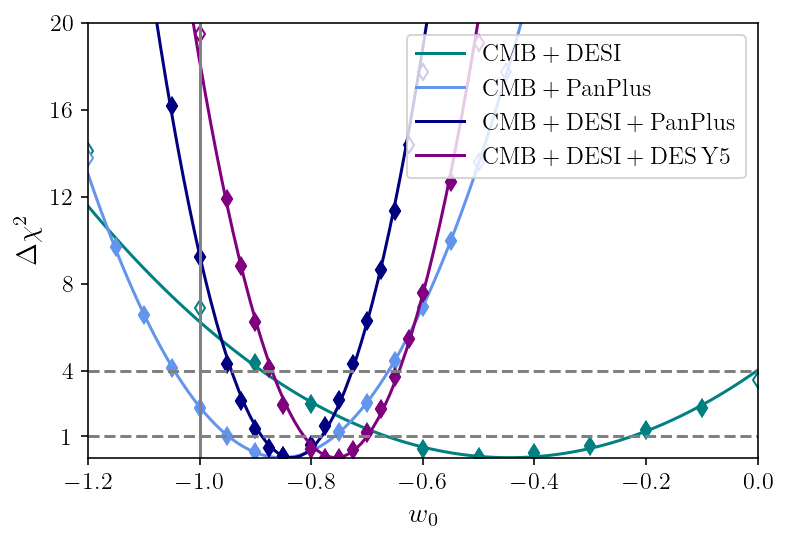

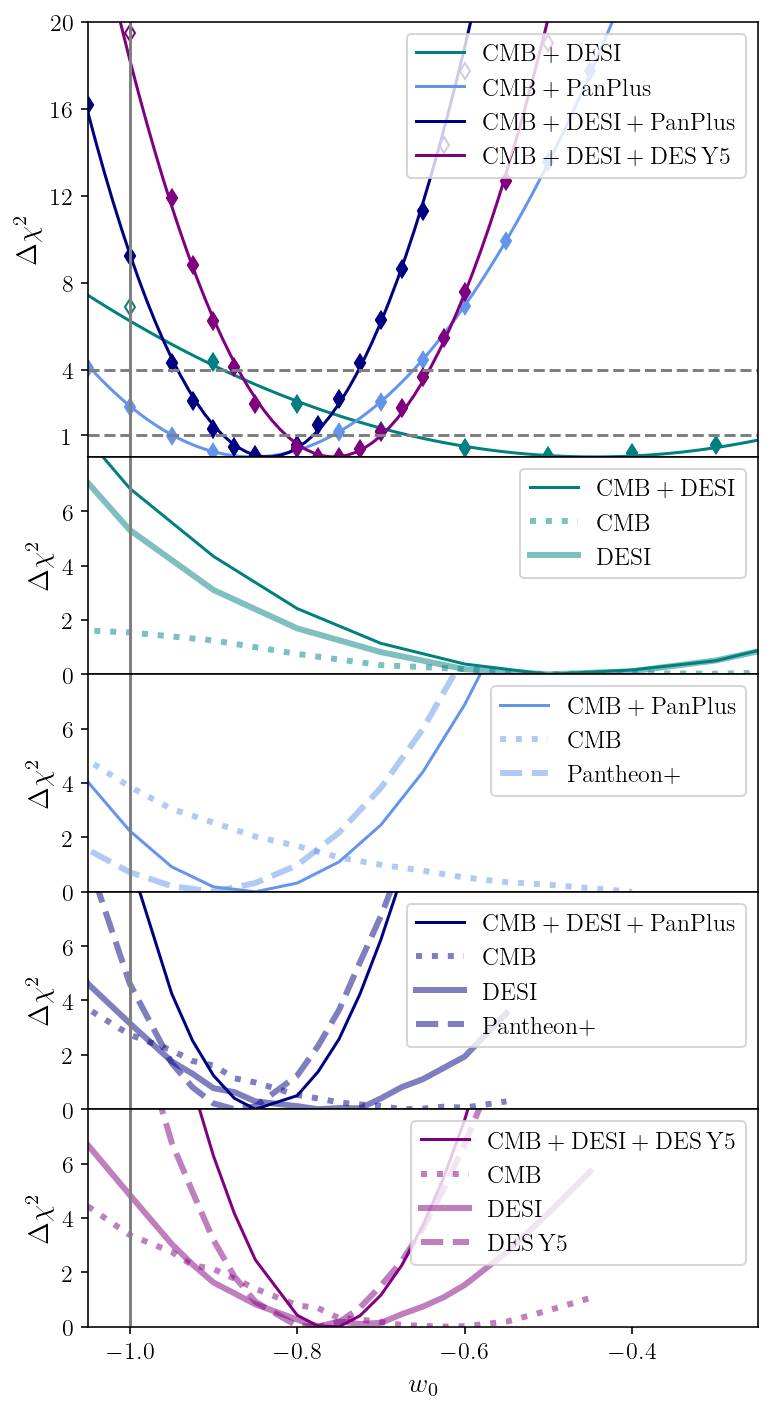

In [29]:
#### Planck ACT DESI
print(label_PAD2)

#Fit parabola
min_PAD2, max_PAD2 = [4, -4]
[a,b,c], pcov = curve_fit(parab, w0_PAD2[min_PAD2:max_PAD2] , chi2_w0_PAD2[min_PAD2:max_PAD2] , p0=[4000., 100., -0.8], maxfev=100000)
fit_x_PAD2 = np.arange(-200,100.,0.01)
fit_y_PAD2 = a + b * (fit_x_PAD2-c)**2.
ordinate_PAD2 = a + b*(lower_lim-c)**2
parab_min_PAD2 = a
bf_w0_PAD2 = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PAD2 = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAD2
print("min. chi2:", a)
print(f"w_0 = {c} \pm {sigma_PAD2}")
print("******************************")

#----------------------------------------------------------------------------
#### Planck ACT DESI Pan+
print(label_PADP)

#Fit parabola
min_PADP, max_PADP = [1, -3]
[a,b,c], pcov = curve_fit(parab, w0_PADP[min_PADP:max_PADP] , chi2_w0_PADP[min_PADP:max_PADP] , p0=[4000., 100., -0.8], maxfev=100000)
fit_x_PADP = np.arange(-200,100.,0.01)
fit_y_PADP = a + b * (fit_x_PADP-c)**2.
ordinate_PADP = a + b*(lower_lim-c)**2
parab_min_PADP = a
bf_w0_PADP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADP = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADP
print("min. chi2:", a)
print(f"w_0 = {c} \pm {sigma_PADP}")
print("******************************")

#----------------------------------------------------------------------------
#### Planck ACT DESI DESY5
print(label_PADS)

#Fit parabola
min_PADS, max_PADS = [2, -2]
[a,b,c], pcov = curve_fit(parab, w0_PADS[min_PADS:max_PADS], chi2_w0_PADS[min_PADS:max_PADS] , p0=[4000., 100., -0.8], maxfev=100000)
fit_x_PADS = np.arange(-200,100.,0.01)
fit_y_PADS = a + b * (fit_x_PADS-c)**2.
ordinate_PADS = a + b*(lower_lim-c)**2
parab_min_PADS = a
bf_w0_PADS = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADS = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADS
print("min. chi2:", a)
print(f"w_0 = {bf_w0_PADS} \pm {sigma_PADS}")
print("******************************")

#----------------------------------------------------------------------------
#### Planck ACT Pan+
print(label_PAP)

#Fit parabola
min_PAP, max_PAP = [1, -3]
[a,b,c], pcov = curve_fit(parab, w0_PAP[min_PAP:max_PAP] , chi2_w0_PAP[min_PAP:max_PAP], p0=[4000., 100., -0.8], maxfev=100000)
fit_x_PAP = np.arange(-200,100.,0.01)
fit_y_PAP = a + b * (fit_x_PAP-c)**2.
ordinate_PAP = a + b*(lower_lim-c)**2
parab_min_PAP = a
bf_w0_PAP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PAP = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAP
print("min. chi2:", a)
print(f"w_0 = {c} \pm {sigma_PAP}")
print("******************************")

#----------------------------------------------------------------------------
###### Plot
plt.plot(w0_PAD2, chi2_w0_PAD2-parab_min_PAD2, marker="d", ls="", color=color_PAD2, markerfacecolor='white')
plt.plot(w0_PAD2[min_PAD2:max_PAD2], chi2_w0_PAD2[min_PAD2:max_PAD2]-parab_min_PAD2, marker="d", ls="", color=color_PAD2)
plt.plot(fit_x_PAD2, fit_y_PAD2 - parab_min_PAD2, color=color_PAD2, ls='-', label=label_PAD2)

plt.plot(w0_PAP, chi2_w0_PAP-parab_min_PAP, marker="d", ls="", color=color_PAP, markerfacecolor='white')
plt.plot(w0_PAP[min_PAP:max_PAP], chi2_w0_PAP[min_PAP:max_PAP]-parab_min_PAP, marker="d", ls="", color=color_PAP)
plt.plot(fit_x_PAP, fit_y_PAP - parab_min_PAP, color=color_PAP, ls='-', label=label_PAP)

plt.plot(w0_PADP, chi2_w0_PADP-parab_min_PADP, marker="d", ls="", color=color_PADP, markerfacecolor='white')
plt.plot(w0_PADP[min_PADP:max_PADP], chi2_w0_PADP[min_PADP:max_PADP]-parab_min_PADP, marker="d", ls="", color=color_PADP)
plt.plot(fit_x_PADP, fit_y_PADP - parab_min_PADP, color=color_PADP, ls='-', label=label_PADP)

plt.plot(w0_PADS, chi2_w0_PADS-parab_min_PADS, marker="d", ls="", color=color_PADS, markerfacecolor='white')
plt.plot(w0_PADS[min_PADS:max_PADS], chi2_w0_PADS[min_PADS:max_PADS]-parab_min_PADS, marker="d", ls="", color=color_PADS)
plt.plot(fit_x_PADS, fit_y_PADS - parab_min_PADS, color=color_PADS, ls='-', label=label_PADS)

plt.axhline(1, ls="--", color="gray")
plt.axhline(4, ls="--", color="gray")
plt.axvline(-1, ls="-", color="gray")

# Aesthetics
plt.xlabel(r"$w_0$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.yticks([1, 4, 8, 12, 16, 20])
plt.ylim(0,20)
plt.xlim(-1.2, 0.)
plt.legend(loc= "upper right")
plt.savefig("PL_w0.pdf", format="PDF")
plt.show()

#----------------------------------------------------------------------------
#### Large plot
fig = plt.figure(figsize=(6, 12))
gs = gridspec.GridSpec(5, 1, height_ratios=[2, 1, 1, 1, 1])  # First subplot is twice the height of the others

# Subplot1
ax1 = fig.add_subplot(gs[0])

ax1.plot(w0_PAD2, chi2_w0_PAD2-parab_min_PAD2, marker="d", ls="", color=color_PAD2, markerfacecolor='white')
ax1.plot(w0_PAD2[min_PAD2:max_PAD2], chi2_w0_PAD2[min_PAD2:max_PAD2]-parab_min_PAD2, marker="d", ls="", color=color_PAD2)
ax1.plot(fit_x_PAD2, fit_y_PAD2 - parab_min_PAD2, color=color_PAD2, ls='-', label=label_PAD2)

ax1.plot(w0_PAP, chi2_w0_PAP-parab_min_PAP, marker="d", ls="", color=color_PAP)
ax1.plot(fit_x_PAP, fit_y_PAP - parab_min_PAP, color=color_PAP, ls='-', label=label_PAP)

ax1.plot(w0_PADP, chi2_w0_PADP-parab_min_PADP, marker="d", ls="", color=color_PADP, markerfacecolor='white')
ax1.plot(w0_PADP[min_PADP:max_PADP], chi2_w0_PADP[min_PADP:max_PADP]-parab_min_PADP, marker="d", ls="", color=color_PADP)
ax1.plot(fit_x_PADP, fit_y_PADP - parab_min_PADP, color=color_PADP, ls='-', label=label_PADP)

ax1.plot(w0_PADS, chi2_w0_PADS-parab_min_PADS, marker="d", ls="", color=color_PADS, markerfacecolor='white')
ax1.plot(w0_PADS[min_PADS:max_PADS], chi2_w0_PADS[min_PADS:max_PADS]-parab_min_PADS, marker="d", ls="", color=color_PADS)
ax1.plot(fit_x_PADS, fit_y_PADS - parab_min_PADS, color=color_PADS, ls='-', label=label_PADS)

ax1.axhline(1, ls="--", color="gray")
ax1.axhline(4, ls="--", color="gray")
ax1.axvline(-1, ls="-", color="gray")
ax1.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax1.set_ylim(0, 20)
ax1.set_yticks([1, 4, 8, 12, 16, 20])
ax1.legend(loc="upper right")
ax1.label_outer()

# PAD
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(w0_PAD2, chi2_w0_PAD2-np.min(chi2_w0_PAD2), ls="-", label=label_PAD2, color=color_PAD2)
ax2.plot(w0_PAD2, chi2_w0_PAD2_CMB-np.min(chi2_w0_PAD2_CMB), ls=ls_CMB, color=color_PAD2, lw=3, alpha=0.5, label=label_CMB)
ax2.plot(w0_PAD2, chi2_w0_PAD2_bao_desi_DR2-np.min(chi2_w0_PAD2_bao_desi_DR2), ls=ls_DESI, color=color_PAD2, lw=3, alpha=0.5, label=label_DESI)
ax2.axvline(-1, ls="-", color="gray")
ax2.set_ylim(0, 8)
ax2.set_yticks([0, 2, 4, 6])
ax2.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax2.legend(loc="upper right")
ax2.label_outer()

# PAP
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax3.plot(w0_PAP, chi2_w0_PAP-np.min(chi2_w0_PAP), ls="-", label=label_PAP, color=color_PAP)
ax3.plot(w0_PAP, chi2_w0_PAP_CMB-np.min(chi2_w0_PAP_CMB), ls=ls_CMB, color=color_PAP, lw=3, alpha=0.5, label=label_CMB)
ax3.plot(w0_PAP, chi2_w0_PAP_Pantheon_Plus-np.min(chi2_w0_PAP_Pantheon_Plus), ls=ls_SN, color=color_PAP, lw=3, alpha=0.5, label=label_Pan)
ax3.axvline(-1, ls="-", color="gray")
ax3.set_ylim(0, 8)
ax3.set_yticks([0, 2, 4, 6])
ax3.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax3.legend(loc="upper right")
ax3.label_outer()

# PADP
ax4 = fig.add_subplot(gs[3], sharex=ax1)
ax4.plot(w0_PADP, chi2_w0_PADP-np.min(chi2_w0_PADP), ls="-", label=label_PADP, color=color_PADP)
ax4.plot(w0_PADP, chi2_w0_PADP_CMB-np.min(chi2_w0_PADP_CMB), ls=ls_CMB, color=color_PADP, lw=3, alpha=0.5, label=label_CMB)
ax4.plot(w0_PADP, chi2_w0_PADP_bao_desi_DR2-np.min(chi2_w0_PADP_bao_desi_DR2), ls=ls_DESI, color=color_PADP, lw=3, alpha=0.5, label=label_DESI)
ax4.plot(w0_PADP, chi2_w0_PADP_Pantheon_Plus-np.min(chi2_w0_PADP_Pantheon_Plus), ls=ls_SN, color=color_PADP, lw=3, alpha=0.5, label=label_Pan)
ax4.axvline(-1, ls="-", color="gray")
ax4.set_ylim(0, 8)
ax4.set_yticks([0, 2, 4, 6])
ax4.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax4.set_xticks([])
ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax4.legend()

# PADS
ax5 = fig.add_subplot(gs[4], sharex=ax1)
ax5.plot(w0_PADS, chi2_w0_PADS-np.min(chi2_w0_PADS), ls="-", label=label_PADS, color=color_PADS)
ax5.plot(w0_PADS, chi2_w0_PADS_CMB-np.min(chi2_w0_PADS_CMB), ls=ls_CMB, color=color_PADS, lw=3, alpha=0.5, label=label_CMB)
ax5.plot(w0_PADS, chi2_w0_PADS_bao_desi_DR2-np.min(chi2_w0_PADS_bao_desi_DR2), ls=ls_DESI, color=color_PADS, lw=3, alpha=0.5, label=label_DESI)
ax5.plot(w0_PADS, chi2_w0_PADS_DESY5_SNe-np.min(chi2_w0_PADS_DESY5_SNe), ls=ls_SN, color=color_PADS, lw=3, alpha=0.5, label=label_DES)
ax5.axvline(-1, ls="-", color="gray")
ax5.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax5.set_ylim(0, 8)
ax4.set_xticks([-1.2, -1.0, -0.8, -0.6, -0.4, -0.2])
ax5.set_yticks([0, 2, 4, 6])
ax5.legend(loc="upper right")

# Aesthetics
plt.xlabel(r"$w_0$", fontdict=font)
ax1.set_xlim(-1.05, -0.25)
plt.subplots_adjust(hspace=0)
plt.savefig("PL_w0_all.pdf", format="PDF", bbox_inches='tight')
plt.show()

# $w_a$

$\mathrm{CMB + DESI}$
min. chi2 2790.560852078348
w_a = -1.624935113917563 \pm 0.6546535863458117
******************************
$\mathrm{CMB + PanPlus}$
min. chi2 4193.218957307036
w_a = -0.6222102424984544 \pm 0.507328614769333
******************************
$\mathrm{CMB + DESI + PanPlus}$
min. chi2 4203.365260651771
w_a = -0.596597578432308 \pm 0.21515879381209785
******************************
$\mathrm{CMB + DESI + DES\, Y5}$
min. chi2 4429.766194537313
w_a = -0.8064747526139984 \pm 0.2060518960492368


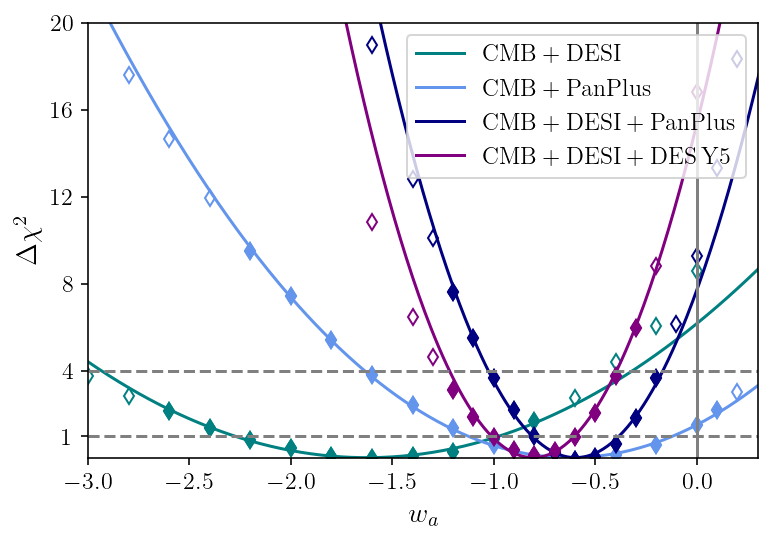

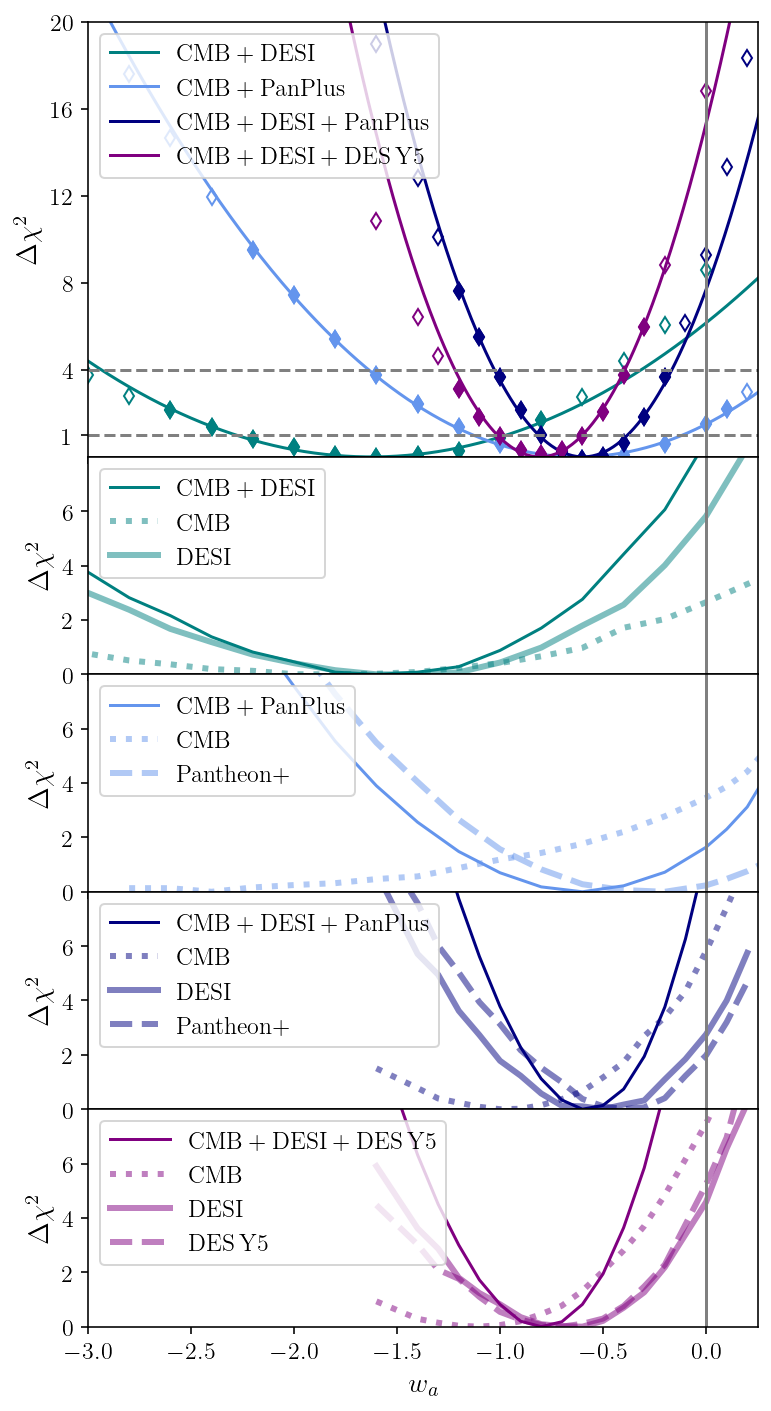

In [31]:
#### Planck ACT DESI DR2
print(label_PAD2)

#Fit parabola
min_PAD2, max_PAD2 = [4, -5]
[a,b,c], pcov = curve_fit(parab, wa_PAD2[min_PAD2:max_PAD2], chi2_wa_PAD2[min_PAD2:max_PAD2] , p0=[1388., 53., -0.13], maxfev=100000)
fit_x_PAD2 = np.arange(-200,100.,0.01)
fit_y_PAD2 = a + b * (fit_x_PAD2-c)**2.
ordinate_PAD2 = a + b*(lower_lim-c)**2
parab_min_PAD2 = a
bf_wa_PAD2 = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PAD2 = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAD2
print("min. chi2", a)
print(f"w_a = {bf_wa_PAD2} \pm {sigma_PAD2}")
print("******************************")

#----------------------------------------------------------------------------
### Planck ACT Pantheon+
print(label_PAP)

#Fit parabola
min_PAP, max_PAP = [3, -2]
[a,b,c], pcov = curve_fit(parab, wa_PAP[min_PAP:max_PAP], chi2_wa_PAP[min_PAP:max_PAP], p0=[1388., 53., -0.13], maxfev=100000)
fit_x_PAP = np.arange(-200,100.,0.01)
fit_y_PAP = a + b * (fit_x_PAP-c)**2.
ordinate_PAP = a + b*(lower_lim-c)**2
parab_min_PAP = a
bf_wa_PAP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PAP = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAP
print("min. chi2", a)
print(f"w_a = {bf_wa_PAP} \pm {sigma_PAP}")
print("******************************")

#----------------------------------------------------------------------------
### Planck ACT DESI Pantheon+
print(label_PADP)

#Fit parabola
min_PADP, max_PADP = [3, -4]
[a,b,c], pcov = curve_fit(parab, wa_PADP[min_PADP:max_PADP], chi2_wa_PADP[min_PADP:max_PADP] , p0=[1388., 53., -0.13], maxfev=100000)
fit_x_PADP = np.arange(-200,100.,0.01)
fit_y_PADP = a + b * (fit_x_PADP-c)**2.
ordinate_PADP = a + b*(lower_lim-c)**2
parab_min_PADP = a
bf_wa_PADP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADP = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADP
print("min. chi2", a)
print(f"w_a = {bf_wa_PADP} \pm {sigma_PADP}")
print("******************************")

#----------------------------------------------------------------------------
### Planck ACT DESI DES Y5
print(label_PADS)

#Fit parabola
min_PADS, max_PADS = [4, -3]
[a,b,c], pcov = curve_fit(parab, wa_PADS[min_PADS:max_PADS], chi2_wa_PADS[min_PADS:max_PADS] , p0=[1388., 53., -0.13], maxfev=100000)
fit_x_PADS = np.arange(-200,100.,0.01)
fit_y_PADS = a + b * (fit_x_PADS-c)**2.
ordinate_PADS = a + b*(lower_lim-c)**2
parab_min_PADS = a
bf_wa_PADS = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADS = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADS
print("min. chi2", a)
print(f"w_a = {bf_wa_PADS} \pm {sigma_PADS}")

#----------------------------------------------------------------------------
# Plot

plt.plot(wa_PAD2, chi2_wa_PAD2-parab_min_PAD2, marker="d", ls="", color=color_PAD2, markerfacecolor="white")
plt.plot(wa_PAD2[min_PAD2:max_PAD2], chi2_wa_PAD2[min_PAD2:max_PAD2]-parab_min_PAD2, marker="d", ls="", color=color_PAD2)
plt.plot(fit_x_PAD2, fit_y_PAD2 - parab_min_PAD2, color=color_PAD2, ls='-', label=label_PAD2)

plt.plot(wa_PAP, chi2_wa_PAP-parab_min_PAP, marker="d", ls="", color=color_PAP, markerfacecolor="white")
plt.plot(wa_PAP[min_PAP:max_PAP], chi2_wa_PAP[min_PAP:max_PAP]-parab_min_PAP, marker="d", ls="", color=color_PAP)
plt.plot(fit_x_PAP, fit_y_PAP - parab_min_PAP, color=color_PAP, ls='-', label=label_PAP)

plt.plot(wa_PADP, chi2_wa_PADP-parab_min_PADP, marker="d", ls="", color=color_PADP, markerfacecolor="white")
plt.plot(wa_PADP[min_PADP:max_PADP], chi2_wa_PADP[min_PADP:max_PADP]-parab_min_PADP, marker="d", ls="", color=color_PADP)
plt.plot(fit_x_PADP, fit_y_PADP - parab_min_PADP, color=color_PADP, ls='-', label=label_PADP)

plt.plot(wa_PADS, chi2_wa_PADS-parab_min_PADS, marker="d", ls="", color=color_PADS, markerfacecolor="white")
plt.plot(wa_PADS[min_PADP:max_PADP], chi2_wa_PADS[min_PADP:max_PADP]-parab_min_PADS, marker="d", ls="", color=color_PADS)
plt.plot(fit_x_PADS, fit_y_PADS - parab_min_PADS, color=color_PADS, ls='-', label=label_PADS)

plt.axhline(1, ls="--", color="gray")
plt.axhline(4, ls="--", color="gray")
plt.axvline(0, ls="-", color="gray")

# Aesthetics
plt.xlabel(r"$w_a$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 20)
plt.xlim(-3, 0.3)
plt.yticks([1, 4, 8, 12, 16, 20])
plt.legend(loc= "upper right")
plt.savefig("PL_wa.pdf", format="PDF")
plt.show()

#----------------------------------------------------------------------------
#### Large plot
fig = plt.figure(figsize=(6, 12))
gs = gridspec.GridSpec(5, 1, height_ratios=[2, 1, 1, 1, 1])  # First subplot is twice the height of the others

# All
ax1 = fig.add_subplot(gs[0])

ax1.plot(wa_PAD2, chi2_wa_PAD2-parab_min_PAD2, marker="d", ls="", color=color_PAD2, markerfacecolor="white")
ax1.plot(wa_PAD2[min_PAD2:max_PAD2], chi2_wa_PAD2[min_PAD2:max_PAD2]-parab_min_PAD2, marker="d", ls="", color=color_PAD2)
ax1.plot(fit_x_PAD2, fit_y_PAD2 - parab_min_PAD2, color=color_PAD2, ls='-', label=label_PAD2)

ax1.plot(wa_PAP, chi2_wa_PAP-parab_min_PAP, marker="d", ls="", color=color_PAP, markerfacecolor="white")
ax1.plot(wa_PAP[min_PAP:max_PAP], chi2_wa_PAP[min_PAP:max_PAP]-parab_min_PAP, marker="d", ls="", color=color_PAP)
ax1.plot(fit_x_PAP, fit_y_PAP - parab_min_PAP, color=color_PAP, ls='-', label=label_PAP)

ax1.plot(wa_PADP, chi2_wa_PADP-parab_min_PADP, marker="d", ls="", color=color_PADP, markerfacecolor="white")
ax1.plot(wa_PADP[min_PADP:max_PADP], chi2_wa_PADP[min_PADP:max_PADP]-parab_min_PADP, marker="d", ls="", color=color_PADP)
ax1.plot(fit_x_PADP, fit_y_PADP - parab_min_PADP, color=color_PADP, ls='-', label=label_PADP)

ax1.plot(wa_PADS, chi2_wa_PADS-parab_min_PADS, marker="d", ls="", color=color_PADS, markerfacecolor="white")
ax1.plot(wa_PADS[min_PADP:max_PADP], chi2_wa_PADS[min_PADP:max_PADP]-parab_min_PADS, marker="d", ls="", color=color_PADS)
ax1.plot(fit_x_PADS, fit_y_PADS - parab_min_PADS, color=color_PADS, ls='-', label=label_PADS)

ax1.axhline(1, ls="--", color="gray")
ax1.axhline(4, ls="--", color="gray")
ax1.axvline(0, ls="-", color="gray")
ax1.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax1.set_ylim(0, 20)
ax1.set_yticks([1, 4, 8, 12, 16, 20])
ax1.legend(loc="upper left")
ax1.label_outer()

# PAD
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(wa_PAD2, chi2_wa_PAD2                  -np.min(chi2_wa_PAD2), ls="-", label=label_PAD2, color=color_PAD2)
ax2.plot(wa_PAD2, chi2_wa_PAD2_CMB              -np.min(chi2_wa_PAD2_CMB), ls=ls_CMB, color=color_PAD2, lw=3, alpha=0.5, label=label_CMB)
ax2.plot(wa_PAD2, chi2_wa_PAD2_bao_desi_DR2     -np.min(chi2_wa_PAD2_bao_desi_DR2), ls=ls_DESI, color=color_PAD2, lw=3, alpha=0.5, label=label_DESI)

ax2.axvline(0, ls="-", color="gray")
ax2.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax2.set_ylim(0, 8)
ax2.set_yticks([0, 2, 4, 6])
ax2.legend(loc="upper left")
ax2.label_outer()

# PAP
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax3.plot(wa_PAP, chi2_wa_PAP                  -np.min(chi2_wa_PAP), ls="-", label=label_PAP, color=color_PAP)
ax3.plot(wa_PAP, chi2_wa_PAP_CMB              -np.min(chi2_wa_PAP_CMB), ls=ls_CMB, color=color_PAP, lw=3, alpha=0.5, label=label_CMB)
ax3.plot(wa_PAP, chi2_wa_PAP_Pantheon_Plus    -np.min(chi2_wa_PAP_Pantheon_Plus), ls=ls_SN, color=color_PAP, lw=3, alpha=0.5, label=label_Pan)

ax3.axvline(0, ls="-", color="gray")
ax3.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax3.set_ylim(0, 8)
ax3.set_yticks([0, 2, 4, 6])
ax3.legend(loc="upper left")
ax3.label_outer()

# PADP
ax4 = fig.add_subplot(gs[3], sharex=ax1)
ax4.plot(wa_PADP, chi2_wa_PADP                  -np.min(chi2_wa_PADP), ls="-", label=label_PADP, color=color_PADP)
ax4.plot(wa_PADP, chi2_wa_PADP_CMB              -np.min(chi2_wa_PADP_CMB), ls=ls_CMB, color=color_PADP, lw=3, alpha=0.5, label=label_CMB)
ax4.plot(wa_PADP, chi2_wa_PADP_bao_desi_DR2     -np.min(chi2_wa_PADP_bao_desi_DR2), ls=ls_DESI, color=color_PADP, lw=3, alpha=0.5, label=label_DESI)
ax4.plot(wa_PADP, chi2_wa_PADP_Pantheon_Plus    -np.min(chi2_wa_PADP_Pantheon_Plus), ls=ls_SN, color=color_PADP, lw=3, alpha=0.5, label=label_Pan)

ax4.axvline(0, ls="-", color="gray")
ax4.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax4.legend(loc="upper left")
ax4.set_ylim(0, 8)
ax4.set_yticks([0, 2, 4, 6])
ax4.set_xticks([])
ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# PADS
ax5 = fig.add_subplot(gs[4], sharex=ax1)
ax5.plot(wa_PADS, chi2_wa_PADS                  -np.min(chi2_wa_PADS), ls="-", label=label_PADS, color=color_PADS)
ax5.plot(wa_PADS, chi2_wa_PADS_CMB              -np.min(chi2_wa_PADS_CMB), ls=ls_CMB, color=color_PADS, lw=3, alpha=0.5, label=label_CMB)
ax5.plot(wa_PADS, chi2_wa_PADS_bao_desi_DR2     -np.min(chi2_wa_PADS_bao_desi_DR2), ls=ls_DESI, color=color_PADS, lw=3, alpha=0.5, label=label_DESI)
ax5.plot(wa_PADS, chi2_wa_PADS_DESY5_SNe        -np.min(chi2_wa_PADS_DESY5_SNe), ls=ls_SN, color=color_PADS, lw=3, alpha=0.5, label=label_DES)

ax5.axvline(0, ls="-", color="gray")
ax5.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax5.legend(handlelength=2.5)
ax5.set_ylim(0, 8)
ax5.set_xticks([-3, -2.5, -2, -1.5, -1, -0.5, 0])
ax5.set_yticks([0, 2, 4, 6])

# Aesthetics
plt.xlabel(r"$w_a$", fontdict=font)
plt.xlim(-3, 0.25)
plt.subplots_adjust(hspace=0)  # Adjust hspace to provide more space between plots
plt.savefig("PL_wa_all.pdf", format="PDF", bbox_inches='tight')
plt.show()

# $\Omega_m$ (CPL)

$\mathrm{CMB + DESI}$
min. chi2 2790.4063124813397
Omega_m = 0.3509526687280754 \pm 0.0216305569705757
******************************
$\mathrm{CMB + PanPlus}$
min. chi2 4193.258455407442
Omega_m = 0.31207622801036866 \pm 0.012830006728445725
******************************
$\mathrm{CMB + DESI + PanPlus}$
min. chi2 4203.243136703145
Omega_m = 0.31206104796717493 \pm 0.005724767973703276
******************************
$\mathrm{CMB + DESI + DES\, Y5}$
min. chi2 4429.904624957732
Omega_m = 0.3186717876628911 \pm 0.005656580450970672


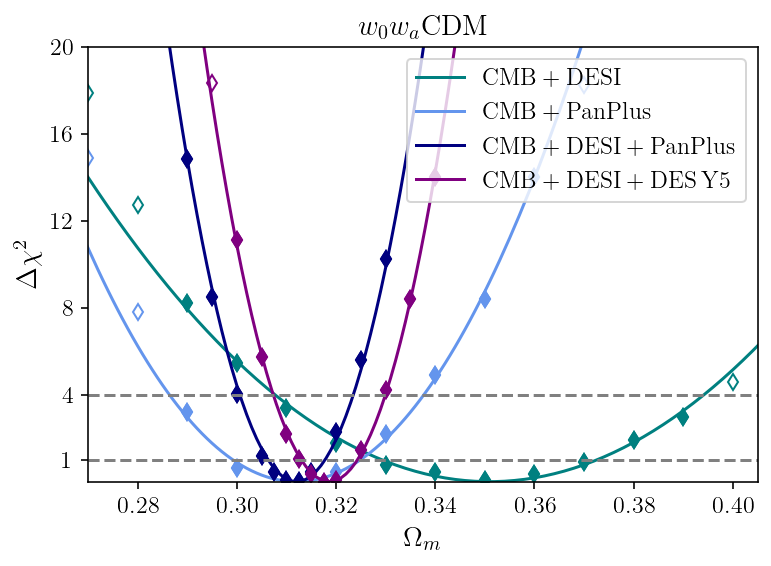

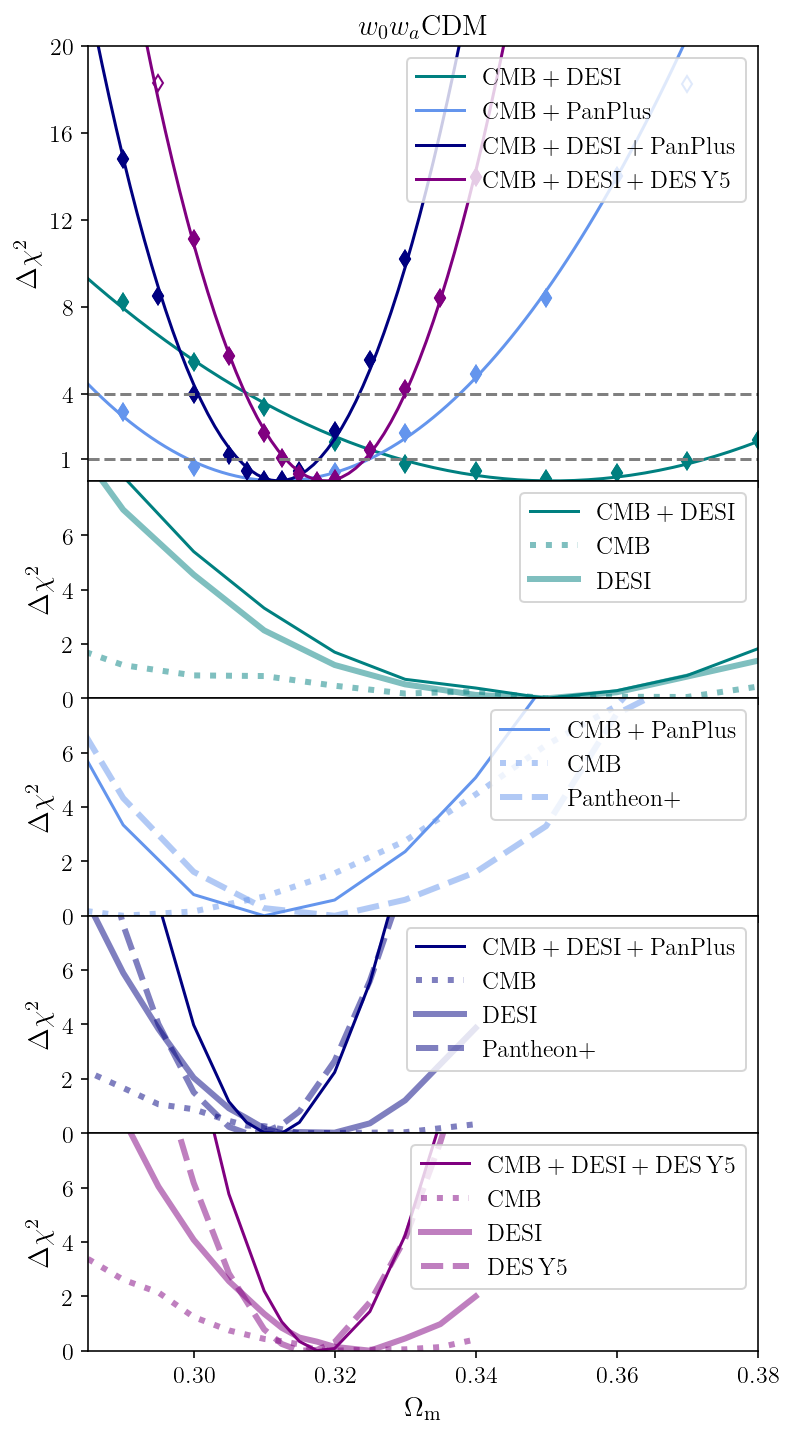

In [32]:
#### Planck ACT DESI DR2
print(label_PAD2)

#Fit parabola
min_PAD2, max_PAD2 = [2, -3]
[a,b,c], pcov = curve_fit(parab, Om_PAD2[min_PAD2:max_PAD2], chi2_Om_PAD2[min_PAD2:max_PAD2], p0=[2790, 2137, 0.3], maxfev=100000)
fit_x_PAD2 = np.arange(0.2,0.5,0.001)
fit_y_PAD2 = a + b * (fit_x_PAD2-c)**2.
ordinate_PAD2 = a + b*(lower_lim-c)**2
parab_min_PAD2 = a
bf_Om_PAD2 = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[0, 10.])
sigma_PAD2 = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAD2
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PAD2}")
print("******************************")

#----------------------------------------------------------------------------
#### Planck ACT Pan+ 
print(label_PAP)

#Fit parabola
min_PAP, max_PAP = [2, -6]
[a,b,c], pcov = curve_fit(parab, Om_PAP[min_PAP:max_PAP], chi2_Om_PAP[min_PAP:max_PAP], p0=[4213., 73203., 0.3], maxfev=100000)
fit_x_PAP = np.arange(0.2,0.5,0.001)
fit_y_PAP = a + b * (fit_x_PAP-c)**2.
ordinate_PAP = a + b*(lower_lim-c)**2
parab_min_PAP = a
bf_Om_PAP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PAP = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAP
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PAP}")

print("******************************")

#----------------------------------------------------------------------------
#### Planck ACT DESI DR2 Pan+
print(label_PADP)

#Fit parabola
min_PADP, max_PADP = [1, None]
[a,b,c], pcov = curve_fit(parab, Om_PADP[min_PADP:max_PADP], chi2_Om_PADP[min_PADP:max_PADP], p0=[4213., 73203., 0.3], maxfev=100000)
fit_x_PADP = np.arange(0.2,0.5,0.001)
fit_y_PADP = a + b * (fit_x_PADP-c)**2.
ordinate_PADP = a + b*(lower_lim-c)**2
parab_min_PADP = a
bf_Om_PADP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADP = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADP
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PADP}")

print("******************************")

#----------------------------------------------------------------------------
#### Planck ACT DESI DR2 DES Y3
print(label_PADS)

#Fit parabola
min_PADS, max_PADS = [3, None]
[a,b,c], pcov = curve_fit(parab, Om_PADS[min_PADS:max_PADS], chi2_Om_PADS[min_PADS:max_PADS], p0=[44435, 25984, 0.32], maxfev=100000)
fit_x_PADS = np.arange(0.2,0.5,0.001)
fit_y_PADS = a + b * (fit_x_PADS-c)**2.
ordinate_PADS = a + b*(lower_lim-c)**2
parab_min_PADS = a
bf_Om_PADS = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADS = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADS
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PADS}")

#----------------------------------------------------------------------------
# Plot

plt.title(r"$w_0w_a\mathrm{CDM}$")
plt.plot(Om_PAD2, chi2_Om_PAD2-parab_min_PAD2, marker="d", ls="", color=color_PAD2, markerfacecolor="white")
plt.plot(Om_PAD2[min_PAD2:max_PAD2], chi2_Om_PAD2[min_PAD2:max_PAD2]-parab_min_PAD2, marker="d", ls="", color=color_PAD2)
plt.plot(fit_x_PAD2, fit_y_PAD2 - parab_min_PAD2, color=color_PAD2, ls='-', label=label_PAD2)

plt.plot(Om_PAP, chi2_Om_PAP-parab_min_PAP, marker="d", ls="", color=color_PAP, markerfacecolor="white")
plt.plot(Om_PAP[min_PAP:max_PAP], chi2_Om_PAP[min_PAP:max_PAP]-parab_min_PAP, marker="d", ls="", color=color_PAP)
plt.plot(fit_x_PAP, fit_y_PAP - parab_min_PAP, color=color_PAP, ls='-', label=label_PAP)

plt.plot(Om_PADP, chi2_Om_PADP-parab_min_PADP, marker="d", ls="", color=color_PADP, markerfacecolor="white")
plt.plot(Om_PADP[min_PADP:max_PADP], chi2_Om_PADP[min_PADP:max_PADP]-parab_min_PADP, marker="d", ls="", color=color_PADP)
plt.plot(fit_x_PADP, fit_y_PADP - parab_min_PADP, color=color_PADP, ls='-', label=label_PADP)

plt.plot(Om_PADS, chi2_Om_PADS-parab_min_PADS, marker="d", ls="", color=color_PADS, markerfacecolor="white")
plt.plot(Om_PADS[min_PADS:max_PADS], chi2_Om_PADS[min_PADS:max_PADS]-parab_min_PADS, marker="d", ls="", color=color_PADS)
plt.plot(fit_x_PADS, fit_y_PADS - parab_min_PADS, color=color_PADS, ls='-', label=label_PADS)

plt.axhline(4, ls="--", color="gray")
plt.axhline(1, ls="--", color="gray")

# Aesthetics
plt.xlabel(r"$\Omega_m$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 20)
plt.yticks([1, 4, 8, 12, 16, 20])
plt.xlim(0.27, 0.405)
plt.legend(loc= "upper right")
plt.show()

#----------------------------------------------------------------------------
#### Large plot
fig = plt.figure(figsize=(6, 12))
gs = gridspec.GridSpec(5, 1, height_ratios=[2, 1, 1, 1, 1])  # First subplot is twice the height of the others

# All
ax1 = fig.add_subplot(gs[0])
ax1.set_title(r"$w_0w_a\mathrm{CDM}$")

ax1.plot(Om_PAD2, chi2_Om_PAD2-parab_min_PAD2, marker="d", ls="", color=color_PAD2, markerfacecolor="white")
ax1.plot(Om_PAD2[min_PAD2:max_PAD2], chi2_Om_PAD2[min_PAD2:max_PAD2]-parab_min_PAD2, marker="d", ls="", color=color_PAD2)
ax1.plot(fit_x_PAD2, fit_y_PAD2 - parab_min_PAD2, color=color_PAD2, ls='-', label=label_PAD2)

ax1.plot(Om_PAP, chi2_Om_PAP-parab_min_PAP, marker="d", ls="", color=color_PAP, markerfacecolor="white")
ax1.plot(Om_PAP[min_PAP:max_PAP], chi2_Om_PAP[min_PAP:max_PAP]-parab_min_PAP, marker="d", ls="", color=color_PAP)
ax1.plot(fit_x_PAP, fit_y_PAP - parab_min_PAP, color=color_PAP, ls='-', label=label_PAP)

ax1.plot(Om_PADP, chi2_Om_PADP-parab_min_PADP, marker="d", ls="", color=color_PADP, markerfacecolor="white")
ax1.plot(Om_PADP[min_PADP:max_PADP], chi2_Om_PADP[min_PADP:max_PADP]-parab_min_PADP, marker="d", ls="", color=color_PADP)
ax1.plot(fit_x_PADP, fit_y_PADP - parab_min_PADP, color=color_PADP, ls='-', label=label_PADP)

ax1.plot(Om_PADS, chi2_Om_PADS-parab_min_PADS, marker="d", ls="", color=color_PADS, markerfacecolor="white")
ax1.plot(Om_PADS[min_PADS:max_PADS], chi2_Om_PADS[min_PADS:max_PADS]-parab_min_PADS, marker="d", ls="", color=color_PADS)
ax1.plot(fit_x_PADS, fit_y_PADS - parab_min_PADS, color=color_PADS, ls='-', label=label_PADS)

ax1.axhline(1, ls="--", color="gray")
ax1.axhline(4, ls="--", color="gray")
ax1.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax1.set_ylim(0, 20)
ax1.set_yticks([1, 4, 8, 12, 16, 20])
ax1.legend(loc="upper right")
ax1.label_outer()

# PAD
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(Om_PAD2, chi2_Om_PAD2                  -np.min(chi2_Om_PAD2), ls="-", label=label_PAD2, color=color_PAD2)
ax2.plot(Om_PAD2, chi2_Om_PAD2_CMB              -np.min(chi2_Om_PAD2_CMB), ls=ls_CMB, color=color_PAD2, lw=3, alpha=0.5, label=label_CMB)
ax2.plot(Om_PAD2, chi2_Om_PAD2_bao_desi_DR2     -np.min(chi2_Om_PAD2_bao_desi_DR2), ls=ls_DESI, color=color_PAD2, lw=3, alpha=0.5, label=label_DESI)

ax2.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax2.set_ylim(0, 8)
ax2.set_yticks([0, 2, 4, 6])
ax2.legend(loc="upper right")
ax2.label_outer()

# PAP
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax3.plot(Om_PAP, chi2_Om_PAP                  -np.min(chi2_Om_PAP), ls="-", label=label_PAP, color=color_PAP)
ax3.plot(Om_PAP, chi2_Om_PAP_CMB              -np.min(chi2_Om_PAP_CMB), ls=ls_CMB, color=color_PAP, lw=3, alpha=0.5, label=label_CMB)
ax3.plot(Om_PAP, chi2_Om_PAP_Pantheon_Plus    -np.min(chi2_Om_PAP_Pantheon_Plus), ls=ls_SN, color=color_PAP, lw=3, alpha=0.5, label=label_Pan)

ax3.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax3.set_ylim(0, 8)
ax3.set_yticks([0, 2, 4, 6])
ax3.legend(loc="upper right")
ax3.label_outer()

# PADP
sort = np.argsort(Om_PADP)
ax4 = fig.add_subplot(gs[3], sharex=ax1)
ax4.plot(Om_PADP[sort], chi2_Om_PADP[sort]                  -np.min(chi2_Om_PADP), ls="-", label=label_PADP, color=color_PADP)
ax4.plot(Om_PADP[sort], chi2_Om_PADP_CMB[sort]              -np.min(chi2_Om_PADP_CMB), ls=ls_CMB, color=color_PADP, lw=3, alpha=0.5, label=label_CMB)
ax4.plot(Om_PADP[sort], chi2_Om_PADP_bao_desi_DR2[sort]     -np.min(chi2_Om_PADP_bao_desi_DR2), ls=ls_DESI, color=color_PADP, lw=3, alpha=0.5, label=label_DESI)
ax4.plot(Om_PADP[sort], chi2_Om_PADP_Pantheon_Plus[sort]    -np.min(chi2_Om_PADP_Pantheon_Plus), ls=ls_SN, color=color_PADP, lw=3, alpha=0.5, label=label_Pan)

ax4.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax4.legend()
ax4.set_ylim(0, 8)
ax4.set_yticks([0, 2, 4, 6])
ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# PADS
ax5 = fig.add_subplot(gs[4], sharex=ax1)
ax5.plot(Om_PADS, chi2_Om_PADS                  -np.min(chi2_Om_PADS), ls="-", label=label_PADS, color=color_PADS)
ax5.plot(Om_PADS, chi2_Om_PADS_CMB              -np.min(chi2_Om_PADS_CMB), ls=ls_CMB, color=color_PADS, lw=3, alpha=0.5, label=label_CMB)
ax5.plot(Om_PADS, chi2_Om_PADS_bao_desi_DR2     -np.min(chi2_Om_PADS_bao_desi_DR2), ls=ls_DESI, color=color_PADS, lw=3, alpha=0.5, label=label_DESI)
ax5.plot(Om_PADS, chi2_Om_PADS_DESY5_SNe        -np.min(chi2_Om_PADS_DESY5_SNe), ls=ls_SN, color=color_PADS, lw=3, alpha=0.5, label=label_DES)

ax5.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax5.set_ylim(0, 8)
ax5.set_yticks([0, 2, 4, 6])

#ax5.plot([0], [0], color='grey', ls=ls_CMB, label=label_CMB, lw=3, alpha=0.5)
#ax5.plot([0], [0], color='grey', ls=ls_DESI, label=label_DESI, lw=3, alpha=0.5)
#ax5.plot([0], [0], color='grey', ls=ls_SN, label=label_SN, lw=3, alpha=0.5)
ax5.legend(loc="upper right")

# Aesthetics
plt.xlabel(r"$\Omega_\mathrm{m}$", fontdict=font)
plt.xlim(0.285, 0.38)
plt.subplots_adjust(hspace=0)  # Adjust hspace to provide more space between plots
plt.savefig("PL_Om_all.pdf", format="PDF", bbox_inches='tight')
plt.show()

# $\Omega_m$ ($\Lambda$CDM)

$\mathrm{CMB + DESI}$
min. chi2 2800.18238741826
Omega_m = 0.3011243655763601 \pm 0.0037504953176552003
******************************
$\mathrm{CMB + PanPlus}$
min. chi2 4195.501048262197
Omega_m = 0.3170630929883745 \pm 0.0064877014675818745
******************************
$\mathrm{CMB + DESI + PanPlus}$
min. chi2 4213.091136654695
Omega_m = 0.30252324250662627 \pm 0.0036660250744095513
******************************
$\mathrm{CMB + DESI + DES\, Y5}$
min. chi2 4449.488014736591
Omega_m = 0.3037738250733987 \pm 0.0036418634614852896
******************************


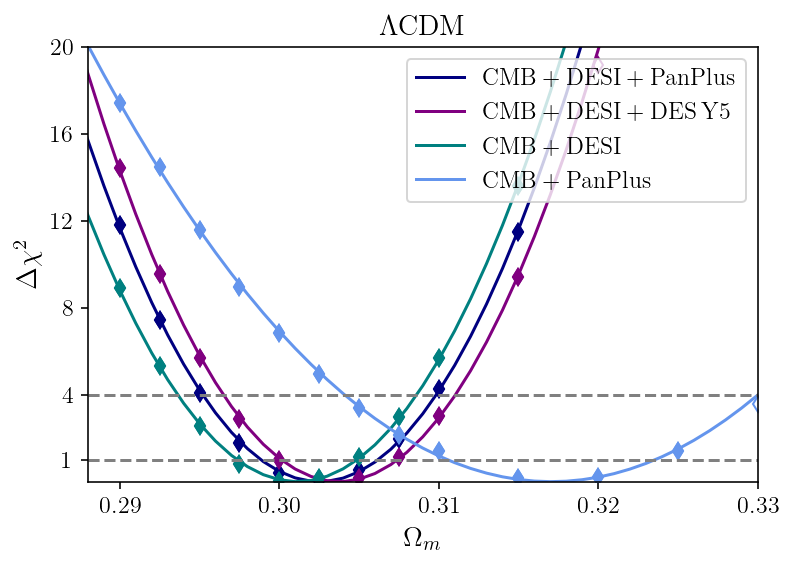

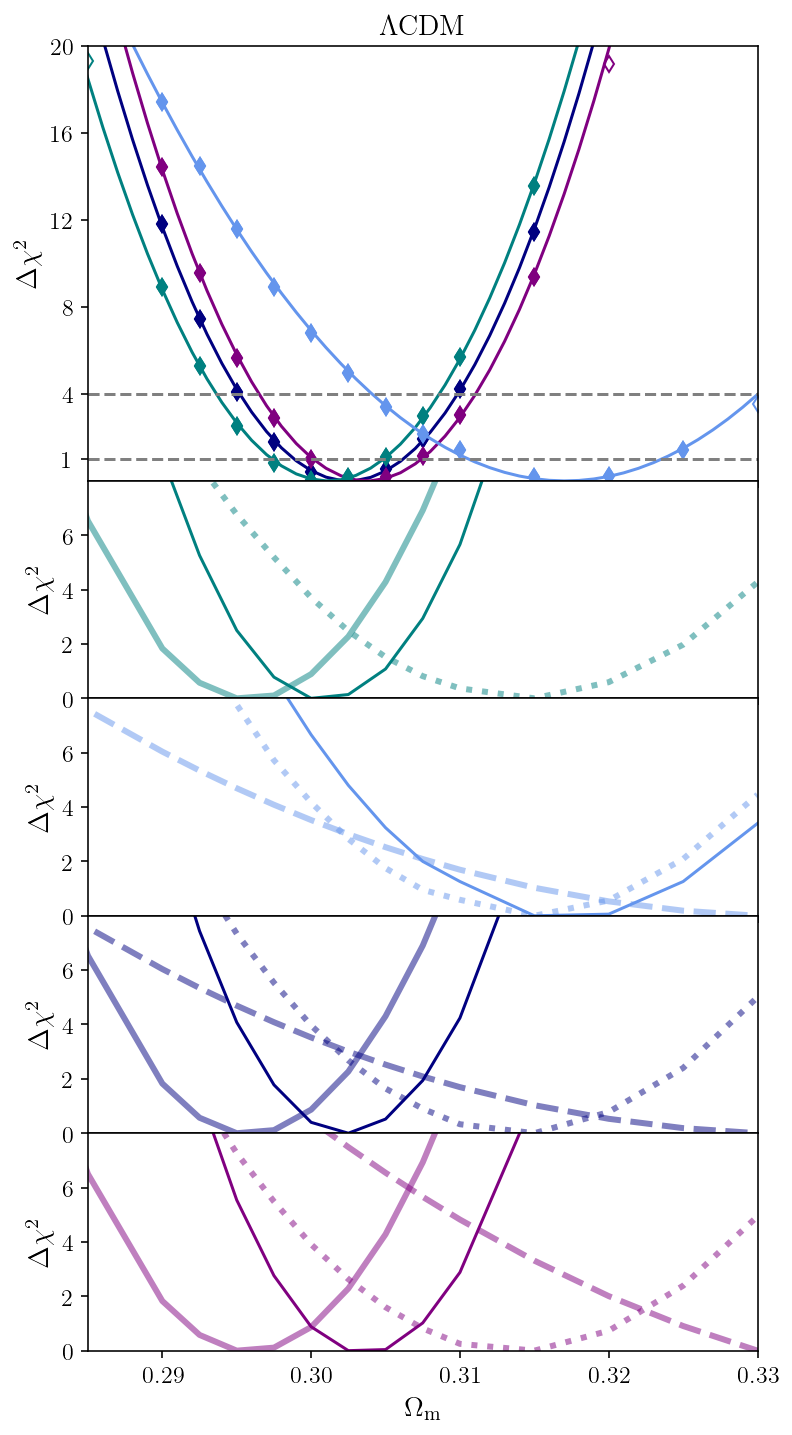

In [34]:
#### Planck ACT DESI (LCDM)
print(label_PAD2)

#Fit parabola
min_PAD2, max_PAD2 = [2, -3]
[a,b,c], pcov = curve_fit(parab, Om_PAD_LCDM[min_PAD2:max_PAD2], chi2_Om_PAD_LCDM[min_PAD2:max_PAD2], p0=[4213., 73203., 0.3], maxfev=100000)
fit_x_PAD_LCDM = np.arange(0.2,0.5,0.001)
fit_y_PAD_LCDM = a + b * (fit_x_PAD_LCDM-c)**2.
ordinate_PAD_LCDM = a + b*(lower_lim-c)**2
parab_min_PAD_LCDM = a
bf_Om_LCDM_PAD2 = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PAD_LCDM = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAD_LCDM
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PAD_LCDM}")
print("******************************")

#----------------------------------------------------------------------------

#### Planck ACT Pan+ (LCDM)
print(label_PAP)

#Fit parabola
min_PAP, max_PAP = [2, -1]
[a,b,c], pcov = curve_fit(parab, Om_PAP_LCDM[min_PAP:max_PAP], chi2_Om_PAP_LCDM[min_PAP:max_PAP], p0=[4213., 73203., 0.3], maxfev=100000)
fit_x_PAP_LCDM = np.arange(0.2,0.5,0.001)
fit_y_PAP_LCDM = a + b * (fit_x_PAP_LCDM-c)**2.
ordinate_PAP_LCDM = a + b*(lower_lim-c)**2
parab_min_PAP_LCDM = a
bf_Om_LCDM_PAP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PAP_LCDM = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PAP_LCDM
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PAP_LCDM}")
print("******************************")

#----------------------------------------------------------------------------

#### Planck ACT DESI DR2 Pan+ (LCDM)
print(label_PADP)

#Fit parabola
min_PADP, max_PADP = [2, -3]
sort = np.argsort(Om_PADP_LCDM)
[a,b,c], pcov = curve_fit(parab, Om_PADP_LCDM[sort][min_PADP:max_PADP], chi2_Om_PADP_LCDM[sort][min_PADP:max_PADP], p0=[4213., 73203., 0.3], maxfev=100000)
fit_x_PADP_LCDM = np.arange(0.2,0.5,0.001)
fit_y_PADP_LCDM = a + b * (fit_x_PADP_LCDM-c)**2.
ordinate_PADP_LCDM = a + b*(lower_lim-c)**2
parab_min_PADP_LCDM = a
bf_Om_LCDM_PADP = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADP_LCDM = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADP_LCDM
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PADP_LCDM}")
print("******************************")

#----------------------------------------------------------------------------

#### Planck ACT DESI DES Y5 (LCDM)
print(label_PADS)

#Fit parabola
min_PADS, max_PADS = [2, -3]
[a,b,c], pcov = curve_fit(parab, Om_PADS_LCDM[min_PADS:max_PADS], chi2_Om_PADS_LCDM[min_PADS:max_PADS], p0=[4213., 73203., 0.3], maxfev=100000)
fit_x_PADS_LCDM = np.arange(0.2,0.5,0.001)
fit_y_PADS_LCDM = a + b * (fit_x_PADS_LCDM-c)**2.
ordinate_PADS_LCDM = a + b*(lower_lim-c)**2
parab_min_PADS_LCDM = a
bf_Om_LCDM_PADS = c

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
zeros = fsolve(parabola, x0=[-200, 1.])
sigma_PADS_LCDM = (zeros[1]-zeros[0])/2.
x0 = c/sigma_PADS_LCDM
print("min. chi2", a)
print(f"Omega_m = {c} \pm {sigma_PADS_LCDM}")
print("******************************")

#----------------------------------------------------------------------------
# Plot

plt.title(r"$\Lambda\mathrm{CDM}$")
plt.plot(Om_PADP_LCDM, chi2_Om_PADP_LCDM-parab_min_PADP_LCDM, marker="d", ls="", color=color_PADP, markerfacecolor="white")
plt.plot(Om_PADP_LCDM[sort][min_PADP:max_PADP], chi2_Om_PADP_LCDM[sort][min_PADP:max_PADP]-parab_min_PADP_LCDM, marker="d", ls="", color=color_PADP)
plt.plot(fit_x_PADP_LCDM, fit_y_PADP_LCDM - parab_min_PADP_LCDM, color=color_PADP, ls='-', label=label_PADP)

plt.plot(Om_PADS_LCDM, chi2_Om_PADS_LCDM-parab_min_PADS_LCDM, marker="d", ls="", color=color_PADS, markerfacecolor="white")
plt.plot(Om_PADS_LCDM[min_PADS:max_PADS], chi2_Om_PADS_LCDM[min_PADS:max_PADS]-parab_min_PADS_LCDM, marker="d", ls="", color=color_PADS)
plt.plot(fit_x_PADS_LCDM, fit_y_PADS_LCDM - parab_min_PADS_LCDM, color=color_PADS, ls='-', label=label_PADS)

plt.plot(Om_PAD_LCDM, chi2_Om_PAD_LCDM-parab_min_PAD_LCDM, marker="d", ls="", color=color_PAD2, markerfacecolor="white")
plt.plot(Om_PAD_LCDM[min_PAD2:max_PAD2], chi2_Om_PAD_LCDM[min_PAD2:max_PAD2]-parab_min_PAD_LCDM, marker="d", ls="", color=color_PAD2)
plt.plot(fit_x_PAD_LCDM, fit_y_PAD_LCDM - parab_min_PAD_LCDM, color=color_PAD2, ls='-', label=label_PAD2)

plt.plot(Om_PAP_LCDM, chi2_Om_PAP_LCDM-parab_min_PAP_LCDM, marker="d", ls="", color=color_PAP, markerfacecolor="white")
plt.plot(Om_PAP_LCDM[min_PAP:max_PAP], chi2_Om_PAP_LCDM[min_PAP:max_PAP]-parab_min_PAP_LCDM, marker="d", ls="", color=color_PAP)
plt.plot(fit_x_PAP_LCDM, fit_y_PAP_LCDM - parab_min_PAP_LCDM, color=color_PAP, ls='-', label=label_PAP)

plt.axhline(1, ls="--", color="gray")
plt.axhline(4, ls="--", color="gray")


# Aesthetics
plt.xlabel(r"$\Omega_m$", fontdict=font)
plt.ylabel(r"$\Delta\chi^2$", fontdict=font)
plt.ylim(0, 20)
plt.xlim(0.288, 0.33)
plt.yticks([1, 4, 8, 12, 16, 20])
plt.xticks([0.29, 0.30, 0.31, 0.32, 0.33])
plt.legend(loc= "upper right")
plt.show()

#----------------------------------------------------------------------------
#### Large plot
fig = plt.figure(figsize=(6, 12))
gs = gridspec.GridSpec(5, 1, height_ratios=[2, 1, 1, 1, 1])  # First subplot is twice the height of the others

# All
ax1 = fig.add_subplot(gs[0])

ax1.plot(Om_PADP_LCDM, chi2_Om_PADP_LCDM-parab_min_PADP_LCDM, marker="d", ls="", color=color_PADP, markerfacecolor="white")
ax1.plot(Om_PADP_LCDM[sort][min_PADP:max_PADP], chi2_Om_PADP_LCDM[sort][min_PADP:max_PADP]-parab_min_PADP_LCDM, marker="d", ls="", color=color_PADP)
ax1.plot(fit_x_PADP_LCDM, fit_y_PADP_LCDM - parab_min_PADP_LCDM, color=color_PADP, ls='-', label=label_PADP)

ax1.plot(Om_PADS_LCDM, chi2_Om_PADS_LCDM-parab_min_PADS_LCDM, marker="d", ls="", color=color_PADS, markerfacecolor="white")
ax1.plot(Om_PADS_LCDM[min_PADS:max_PADS], chi2_Om_PADS_LCDM[min_PADS:max_PADS]-parab_min_PADS_LCDM, marker="d", ls="", color=color_PADS)
ax1.plot(fit_x_PADS_LCDM, fit_y_PADS_LCDM - parab_min_PADS_LCDM, color=color_PADS, ls='-', label=label_PADS)

ax1.plot(Om_PAD_LCDM, chi2_Om_PAD_LCDM-parab_min_PAD_LCDM, marker="d", ls="", color=color_PAD2, markerfacecolor="white")
ax1.plot(Om_PAD_LCDM[min_PAD2:max_PAD2], chi2_Om_PAD_LCDM[min_PAD2:max_PAD2]-parab_min_PAD_LCDM, marker="d", ls="", color=color_PAD2)
ax1.plot(fit_x_PAD_LCDM, fit_y_PAD_LCDM - parab_min_PAD_LCDM, color=color_PAD2, ls='-', label=label_PAD2)

ax1.plot(Om_PAP_LCDM, chi2_Om_PAP_LCDM-parab_min_PAP_LCDM, marker="d", ls="", color=color_PAP, markerfacecolor="white")
ax1.plot(Om_PAP_LCDM[min_PAP:max_PAP], chi2_Om_PAP_LCDM[min_PAP:max_PAP]-parab_min_PAP_LCDM, marker="d", ls="", color=color_PAP)
ax1.plot(fit_x_PAP_LCDM, fit_y_PAP_LCDM - parab_min_PAP_LCDM, color=color_PAP, ls='-', label=label_PAP)

ax1.axhline(1, ls="--", color="gray")
ax1.axhline(4, ls="--", color="gray")
ax1.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax1.set_ylim(0, 20)
ax1.set_yticks([1, 4, 8, 12, 16, 20])
ax1.label_outer()

# PAD
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(Om_PAD_LCDM, chi2_Om_PAD_LCDM                  -np.min(chi2_Om_PAD_LCDM), ls="-", label=label_PAD2, color=color_PAD2)
ax2.plot(Om_PAD_LCDM, chi2_Om_PAD_LCDM_CMB              -np.min(chi2_Om_PAD_LCDM_CMB), ls=ls_CMB, color=color_PAD2, lw=3, alpha=0.5, label=label_CMB)
ax2.plot(Om_PAD_LCDM, chi2_Om_PAD_LCDM_bao_desi_DR2     -np.min(chi2_Om_PAD_LCDM_bao_desi_DR2), ls=ls_DESI, color=color_PAD2, lw=3, alpha=0.5, label=label_DESI)


ax2.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax2.set_ylim(0, 8)
ax2.set_yticks([0, 2, 4, 6])
ax2.label_outer()

# PAP
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax3.plot(Om_PAP_LCDM, chi2_Om_PAP_LCDM                  -np.min(chi2_Om_PAP_LCDM), ls="-", label=label_PAP, color=color_PAP)
ax3.plot(Om_PAP_LCDM, chi2_Om_PAP_LCDM_CMB              -np.min(chi2_Om_PAP_LCDM_CMB), ls=ls_CMB, color=color_PAP, lw=3, alpha=0.5, label=label_CMB)
ax3.plot(Om_PAP_LCDM, chi2_Om_PAP_LCDM_Pantheon_Plus    -np.min(chi2_Om_PAP_LCDM_Pantheon_Plus), ls=ls_SN, color=color_PAP, lw=3, alpha=0.5, label=label_Pan)

ax3.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax3.set_ylim(0, 8)
ax3.set_yticks([0, 2, 4, 6])
ax3.label_outer()

# PADP
sort = np.argsort(Om_PADP_LCDM)
ax4 = fig.add_subplot(gs[3], sharex=ax1)
ax4.plot(Om_PADP_LCDM[sort], chi2_Om_PADP_LCDM[sort]                  -np.min(chi2_Om_PADP_LCDM), ls="-", label=label_PADP, color=color_PADP)
ax4.plot(Om_PADP_LCDM[sort], chi2_Om_PADP_LCDM_CMB[sort]              -np.min(chi2_Om_PADP_LCDM_CMB), ls=ls_CMB, color=color_PADP, lw=3, alpha=0.5, label=label_CMB)
ax4.plot(Om_PADP_LCDM[sort], chi2_Om_PADP_LCDM_bao_desi_DR2[sort]     -np.min(chi2_Om_PADP_LCDM_bao_desi_DR2), ls=ls_DESI, color=color_PADP, lw=3, alpha=0.5, label=label_DESI)
ax4.plot(Om_PADP_LCDM[sort], chi2_Om_PADP_LCDM_Pantheon_Plus[sort]    -np.min(chi2_Om_PADP_LCDM_Pantheon_Plus), ls=ls_SN, color=color_PADP, lw=3, alpha=0.5, label=label_Pan)

ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax4.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax4.set_xlim([0.28, 0.33])
ax4.set_ylim(0, 8)
ax4.set_xticks([])
ax4.set_yticks([0, 2, 4, 6])

# PADS
ax5 = fig.add_subplot(gs[4], sharex=ax1)
ax5.plot(Om_PADS_LCDM, chi2_Om_PADS_LCDM                  -np.min(chi2_Om_PADS_LCDM), ls="-", label=label_PADS, color=color_PADS)
ax5.plot(Om_PADS_LCDM, chi2_Om_PADS_LCDM_CMB              -np.min(chi2_Om_PADS_LCDM_CMB), ls=ls_CMB, color=color_PADS, lw=3, alpha=0.5, label=label_CMB)
ax5.plot(Om_PADS_LCDM, chi2_Om_PADS_LCDM_bao_desi_DR2     -np.min(chi2_Om_PADS_LCDM_bao_desi_DR2), ls=ls_DESI, color=color_PADS, lw=3, alpha=0.5, label=label_DESI)
ax5.plot(Om_PADS_LCDM, chi2_Om_PADS_LCDM_DESY5_SNe        -np.min(chi2_Om_PADS_LCDM_DESY5_SNe), ls=ls_SN, color=color_PADS, lw=3, alpha=0.5, label=label_DES)

ax5.set_ylabel(r"$\Delta\chi^2$", fontdict=font)
ax5.set_ylim(0, 8)
ax5.set_xticks([0.28, 0.29, 0.30, 0.31, 0.32, 0.33])
ax5.set_yticks([0, 2, 4, 6])
#ax5.legend(loc="upper left")

# Aesthetics
ax1.set_title(r"$\Lambda\mathrm{CDM}$")
plt.xlabel(r"$\Omega_\mathrm{m}$", fontdict=font)
plt.xlim(0.285, 0.33)
plt.subplots_adjust(hspace=0)  # Adjust hspace to provide more space between plots
plt.savefig("PL_Om_LCDM_all.pdf", format="PDF", bbox_inches='tight')
plt.show()

# Degeneracy lines

PAD: wp = -1.09
PAP: wp = -0.98
PADP: wp = -0.98
PADS: wp = -0.98


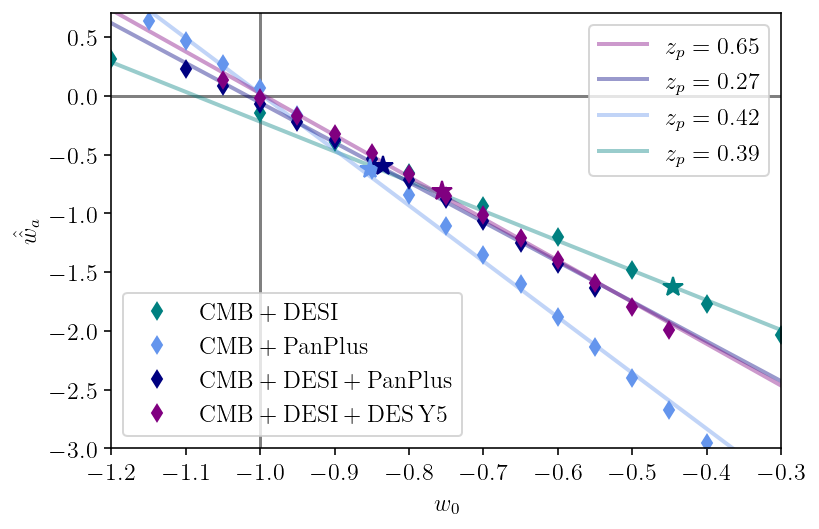

In [37]:
#fig = plt.figure(figsize=(8, 5))
plt.axvline(-1, ls="-", color="gray")
plt.axhline(0, ls="-", color="gray")

w0s = np.array([-2, 0])
wa = lambda w0, zp: -(1.+zp)/zp*(1+w0)

#fit straight lines
#PAD
a, b  = np.polyfit(w0_PAD2[:-5], w0_PAD2_w0wa[:-5]-w0_PAD2[:-5], 1)
zp_PAD2 = -1./(1.+a)
ap_PAD2 = 1./(1.+zp_PAD2)
wp_PAD2 = bf_w0_PAD2 + bf_wa_PAD2*(1-ap_PAD2)
print(f"PAD: wp = {wp_PAD2:.2f}")
plt.plot(w0_PAD2, a*w0_PAD2+b, label=f"$z_p={zp_PAD2:.2f}$", alpha=0.4, lw=2, color=color_PAD2, ls="-")

#PAP
a, b  = np.polyfit(w0_PAP, w0_PAP_w0wa-w0_PAP, 1)
zp_PAP = -1./(1.+a)
ap_PAP = 1./(1.+zp_PAP)
wp_PAP = bf_w0_PAP + bf_wa_PAP*(1-ap_PAP)
print(f"PAP: wp = {wp_PAP:.2f}")
plt.plot(w0_PAD2, a*w0_PAD2+b, label=f"$z_p={zp_PAP:.2f}$", alpha=0.4, lw=2, color=color_PAP, ls="-")

#PADP
a, b  = np.polyfit(w0_PADP, w0_PADP_w0wa-w0_PADP, 1)
zp_PADP = -1./(1.+a)
ap_PADP = 1./(1.+zp_PADP)
wp_PADP = bf_w0_PADP + bf_wa_PADP*(1-ap_PADP)
print(f"PADP: wp = {wp_PAP:.2f}")
plt.plot(w0_PAD2, a*w0_PAD2+b, label=f"$z_p={zp_PADP:.2f}$", alpha=0.4, lw=2, color=color_PADP, ls="-")

#PADS
a, b  = np.polyfit(w0_PADS, w0_PADS_w0wa-w0_PADS, 1)
zp_PADS = -1./(1.+a)
ap_PADS = 1./(1.+zp_PADS)
wp_PADS = bf_w0_PADS + bf_wa_PADS*(1-ap_PADS)
print(f"PADS: wp = {wp_PADS:.2f}")
plt.plot(w0_PAD2, a*w0_PAD2+b, label=f"$z_p={zp_PADS:.2f}$", alpha=0.4, lw=2, color=color_PADS, ls="-")

# First, collect handles for markers
marker_handles = []
marker_labels = []

# These are the marker plots (diamond and star)
marker_handles += plt.plot(w0_PAD2, w0_PAD2_w0wa - w0_PAD2, color=color_PAD2, marker="d", label=label_PAD2, ls="")
marker_handles += plt.plot(w0_PAP, w0_PAP_w0wa - w0_PAP, color=color_PAP, marker="d", label=label_PAP, ls="")
marker_handles += plt.plot(w0_PADP[index_evenspace_PADP], w0_PADP_w0wa[index_evenspace_PADP] - w0_PADP[index_evenspace_PADP], color=color_PADP, marker="d", label=label_PADP, ls="")
marker_handles += plt.plot(w0_PADS[index_evenspace_PADS], w0_PADS_w0wa[index_evenspace_PADS] - w0_PADS[index_evenspace_PADS], color=color_PADS, marker="d", label=label_PADS, ls="")

marker_handles += plt.plot(bf_w0_PAD2, bf_wa_PAD2, marker="*", ls="", markersize=10, color=color_PAD2, label=None)
marker_handles += plt.plot(bf_w0_PAP,  bf_wa_PAP,  marker="*", ls="", markersize=10, color=color_PAP, label=None)
marker_handles += plt.plot(bf_w0_PADP, bf_wa_PADP, marker="*", ls="", markersize=10, color=color_PADP, label=None)
marker_handles += plt.plot(bf_w0_PADS, bf_wa_PADS, marker="*", ls="", markersize=10, color=color_PADS, label=None)

marker_labels = [label_PAD2, label_PAP, label_PADP, label_PADS]

# Then, collect handles for lines (fit lines)
line_handles = []
line_labels = []

# These are the line plots
line_handles += plt.plot([0],[0], label=f"$z_p={zp_PADS:.2f}$", alpha=0.4, lw=2, color=color_PADS, ls="-")
line_handles += plt.plot([0],[0], label=f"$z_p={zp_PADP:.2f}$", alpha=0.4, lw=2, color=color_PADP, ls="-")
line_handles += plt.plot([0],[0], label=f"$z_p={zp_PAP:.2f}$",  alpha=0.4, lw=2, color=color_PAP,  ls="-")
line_handles += plt.plot([0],[0], label=f"$z_p={zp_PAD2:.2f}$", alpha=0.4, lw=2, color=color_PAD2, ls="-")

line_labels = [f"$z_p={zp_PAD2:.2f}$", f"$z_p={zp_PAP:.2f}$", f"$z_p={zp_PADP:.2f}$", f"$z_p={zp_PADS:.2f}$"]

# Create first legend for markers
legend1 = plt.legend(marker_handles[:4], marker_labels, loc="lower left")

# Create second legend for lines
legend2 = plt.legend(line_handles, line_labels, loc="upper right")

# Add the first legend manually to the plot
plt.gca().add_artist(legend1)

# Final plot adjustments
plt.xlim(-1.2,-0.3)
plt.ylim(-3,0.7)
plt.xlabel("$w_0$")
plt.ylabel(r"$\hat{\!\hat{w}}_a$")
plt.savefig("wa_of_w0.pdf", format="PDF")
plt.show()


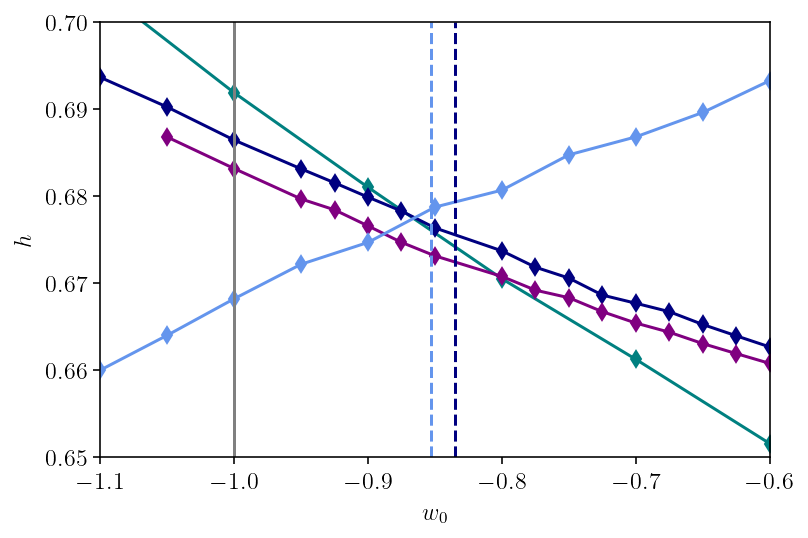

In [14]:
plt.plot(w0_PAD2, w0_PAD2_h, color=color_PAD2, marker="d")
plt.plot(w0_PADP, w0_PADP_h, color=color_PADP, marker="d")
plt.plot(w0_PADS, w0_PADS_h, color=color_PADS, marker="d")
plt.plot(w0_PAP, w0_PAP_h, color=color_PAP, marker="d")

plt.axvline(-1, ls="-", color="gray")
plt.axvline(bf_w0_PAD2, ls="--", color=color_PAD2)
plt.axvline(bf_w0_PADP, ls="--", color=color_PADP)
plt.axvline(bf_w0_PAP, ls="--", color=color_PAP)

plt.xlim(-1.1, -0.6)
plt.ylim(0.65, 0.7)
plt.xlabel("$w_0$")
plt.ylabel("$h$")
plt.show()

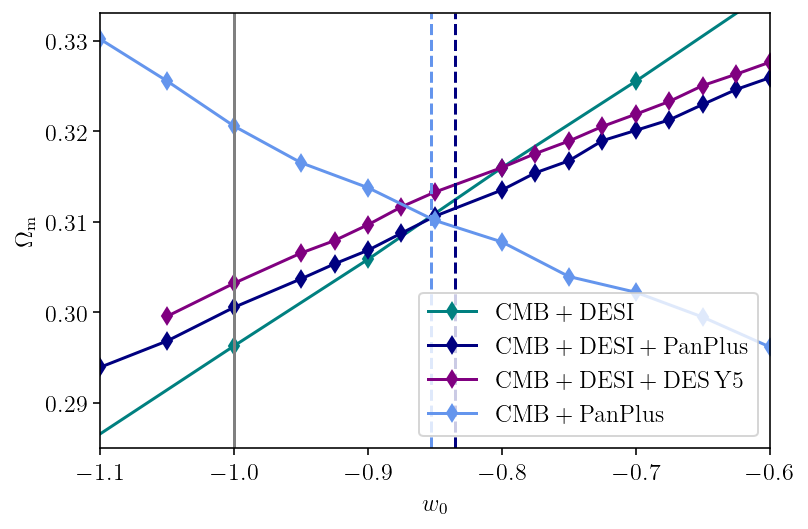

In [15]:
plt.plot(w0_PAD2, w0_PAD2_Om, color=color_PAD2, label=label_PAD2, marker="d")
plt.plot(w0_PADP, w0_PADP_Om, color=color_PADP, label=label_PADP, marker="d")
plt.plot(w0_PADS, w0_PADS_Om, color=color_PADS, label=label_PADS, marker="d")
plt.plot(w0_PAP, w0_PAP_Om, color=color_PAP, label=label_PAP, marker="d")

plt.axvline(-1, ls="-", color="gray")
plt.axvline(bf_w0_PAD2, ls="--", color=color_PAD2)
plt.axvline(bf_w0_PADP, ls="--", color=color_PADP)
plt.axvline(bf_w0_PAP, ls="--", color=color_PAP)

plt.xlim(-1.1, -0.6)
plt.ylim(0.285,0.333)
plt.xlabel("$w_0$")
plt.ylabel("$\Omega_\mathrm{m}$")
plt.legend()
plt.show()

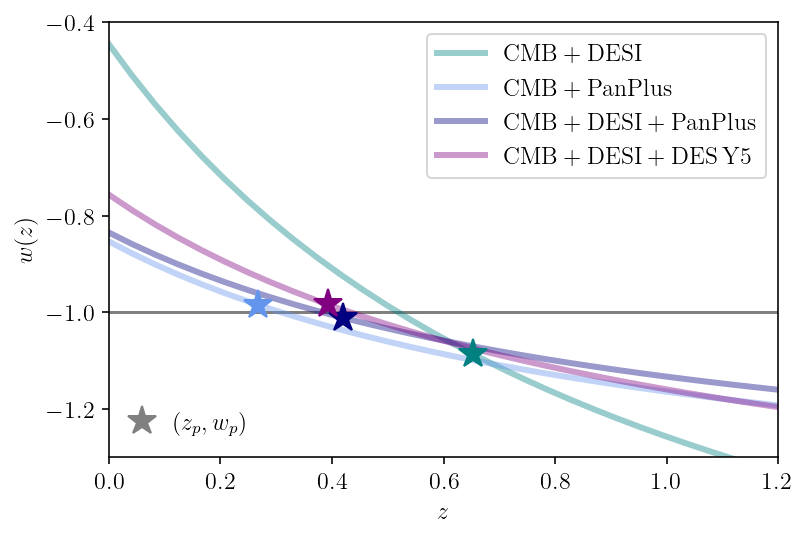

In [39]:
from matplotlib.lines import Line2D

# Plot $w(z)$
z_s = np.linspace(0, 1.2, 30)
a_s = 1. / (1 + z_s)
plt.axhline(-1, ls="-", color="gray")

# Plot each dataset's w(z)
line1, = plt.plot(z_s, bf_w0_PAD2 + bf_wa_PAD2 * (1 - a_s), alpha=0.4, lw=3, color=color_PAD2, label=label_PAD2)
line2, = plt.plot(z_s, bf_w0_PAP  + bf_wa_PAP  * (1 - a_s), alpha=0.4, lw=3, color=color_PAP,  label=label_PAP)
line3, = plt.plot(z_s, bf_w0_PADP + bf_wa_PADP * (1 - a_s), alpha=0.4, lw=3, color=color_PADP, label=label_PADP)
line4, = plt.plot(z_s, bf_w0_PADS + bf_wa_PADS * (1 - a_s), alpha=0.4, lw=3, color=color_PADS, label=label_PADS)

# Plot pivot redshift points
plt.plot(zp_PAD2, wp_PAD2, color=color_PAD2, ls="", marker="*", markersize=15)
plt.plot(zp_PAP,  wp_PAP,  color=color_PAP,  ls="", marker="*", markersize=15)
plt.plot(zp_PADP, wp_PADP, color=color_PADP, ls="", marker="*", markersize=15)
plt.plot(zp_PADS, wp_PADS, color=color_PADS, ls="", marker="*", markersize=15)

# Create dummy handle for pivot redshift legend
pivot_handle = Line2D([], [], color="gray", marker="*", linestyle="None", markersize=15, label=r"$(z_p, w_p)$")

# Add main legend (lines) manually
main_legend = plt.legend(handles=[line1, line2, line3, line4], loc="upper right")
plt.gca().add_artist(main_legend)

# Add pivot redshift legend
plt.legend(handles=[pivot_handle], loc="lower left", handlelength=1, frameon=False)

# Axis settings
plt.xlim(0, 1.2)
plt.ylim(-1.3, -0.4)
plt.yticks([-1.2, -1.0, -0.8, -0.6, -0.4])
plt.xlabel(r"$z$")
plt.ylabel(r"$w(z)$")

# Save and show
plt.savefig("w(z).pdf", format="PDF")
plt.show()
